## PM - MODI speech on manipur incident

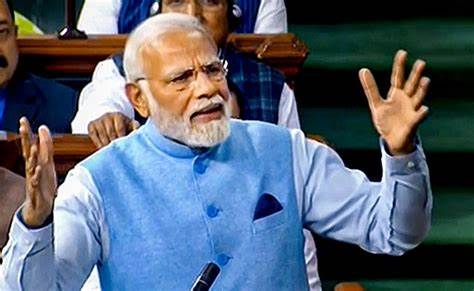

In [45]:
#!pip install nltk
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [46]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [47]:
file_path = "speech.txt"
with open(file_path, "r", encoding='utf-8') as file:
    speech_text = file.read()
print(file_path)
print(speech_text)

speech.txt
“I have come to express immense gratitude towards each and every citizen of India for repeatedly showing their trust in the government”

“Many key legislations did not get the discussion they deserved as the opposition put politics above them”

“This time period of the 21st century will impact the country for the next thousand years. We all should have a single focus”

“We have given the youth of India a government free of scams”

“Today a trust has arisen in the heart of the poor to fulfill his dreams”

“Opposition is not able to see the trust of people as they are so steeped in distrust”

“In 2028, when you will bring a No Confidence Motion, the Country will be among the top 3”

“Opposition believes in changing names but they can’t change their work culture”

“Freedom fighters and founding fathers of the country always opposed dynasty politics”

“Crimes against women are unacceptable and the Central Government and the State Government will work to ensure that the guilty ar

In [48]:
speech_text_cleaned = re.sub(r'[^\w\s]', '', speech_text)
speech_text_cleaned = speech_text_cleaned.lower()
words = word_tokenize(speech_text_cleaned)
stop_words = set(stopwords.words('english'))
word_filtered = [word for word in words if word not in stop_words]
word_filtered

['come',
 'express',
 'immense',
 'gratitude',
 'towards',
 'every',
 'citizen',
 'india',
 'repeatedly',
 'showing',
 'trust',
 'government',
 'many',
 'key',
 'legislations',
 'get',
 'discussion',
 'deserved',
 'opposition',
 'put',
 'politics',
 'time',
 'period',
 '21st',
 'century',
 'impact',
 'country',
 'next',
 'thousand',
 'years',
 'single',
 'focus',
 'given',
 'youth',
 'india',
 'government',
 'free',
 'scams',
 'today',
 'trust',
 'arisen',
 'heart',
 'poor',
 'fulfill',
 'dreams',
 'opposition',
 'able',
 'see',
 'trust',
 'people',
 'steeped',
 'distrust',
 '2028',
 'bring',
 'confidence',
 'motion',
 'country',
 'among',
 'top',
 '3',
 'opposition',
 'believes',
 'changing',
 'names',
 'cant',
 'change',
 'work',
 'culture',
 'freedom',
 'fighters',
 'founding',
 'fathers',
 'country',
 'always',
 'opposed',
 'dynasty',
 'politics',
 'crimes',
 'women',
 'unacceptable',
 'central',
 'government',
 'state',
 'government',
 'work',
 'ensure',
 'guilty',
 'punished',
 '

In [49]:
word_filtered

['come',
 'express',
 'immense',
 'gratitude',
 'towards',
 'every',
 'citizen',
 'india',
 'repeatedly',
 'showing',
 'trust',
 'government',
 'many',
 'key',
 'legislations',
 'get',
 'discussion',
 'deserved',
 'opposition',
 'put',
 'politics',
 'time',
 'period',
 '21st',
 'century',
 'impact',
 'country',
 'next',
 'thousand',
 'years',
 'single',
 'focus',
 'given',
 'youth',
 'india',
 'government',
 'free',
 'scams',
 'today',
 'trust',
 'arisen',
 'heart',
 'poor',
 'fulfill',
 'dreams',
 'opposition',
 'able',
 'see',
 'trust',
 'people',
 'steeped',
 'distrust',
 '2028',
 'bring',
 'confidence',
 'motion',
 'country',
 'among',
 'top',
 '3',
 'opposition',
 'believes',
 'changing',
 'names',
 'cant',
 'change',
 'work',
 'culture',
 'freedom',
 'fighters',
 'founding',
 'fathers',
 'country',
 'always',
 'opposed',
 'dynasty',
 'politics',
 'crimes',
 'women',
 'unacceptable',
 'central',
 'government',
 'state',
 'government',
 'work',
 'ensure',
 'guilty',
 'punished',
 '

In [50]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [51]:
words

['i',
 'have',
 'come',
 'to',
 'express',
 'immense',
 'gratitude',
 'towards',
 'each',
 'and',
 'every',
 'citizen',
 'of',
 'india',
 'for',
 'repeatedly',
 'showing',
 'their',
 'trust',
 'in',
 'the',
 'government',
 'many',
 'key',
 'legislations',
 'did',
 'not',
 'get',
 'the',
 'discussion',
 'they',
 'deserved',
 'as',
 'the',
 'opposition',
 'put',
 'politics',
 'above',
 'them',
 'this',
 'time',
 'period',
 'of',
 'the',
 '21st',
 'century',
 'will',
 'impact',
 'the',
 'country',
 'for',
 'the',
 'next',
 'thousand',
 'years',
 'we',
 'all',
 'should',
 'have',
 'a',
 'single',
 'focus',
 'we',
 'have',
 'given',
 'the',
 'youth',
 'of',
 'india',
 'a',
 'government',
 'free',
 'of',
 'scams',
 'today',
 'a',
 'trust',
 'has',
 'arisen',
 'in',
 'the',
 'heart',
 'of',
 'the',
 'poor',
 'to',
 'fulfill',
 'his',
 'dreams',
 'opposition',
 'is',
 'not',
 'able',
 'to',
 'see',
 'the',
 'trust',
 'of',
 'people',
 'as',
 'they',
 'are',
 'so',
 'steeped',
 'in',
 'distrust

In [52]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
words_lemmatized = [lemmatizer.lemmatize(word) for word in word_filtered]
words_lemmatized

['come',
 'express',
 'immense',
 'gratitude',
 'towards',
 'every',
 'citizen',
 'india',
 'repeatedly',
 'showing',
 'trust',
 'government',
 'many',
 'key',
 'legislation',
 'get',
 'discussion',
 'deserved',
 'opposition',
 'put',
 'politics',
 'time',
 'period',
 '21st',
 'century',
 'impact',
 'country',
 'next',
 'thousand',
 'year',
 'single',
 'focus',
 'given',
 'youth',
 'india',
 'government',
 'free',
 'scam',
 'today',
 'trust',
 'arisen',
 'heart',
 'poor',
 'fulfill',
 'dream',
 'opposition',
 'able',
 'see',
 'trust',
 'people',
 'steeped',
 'distrust',
 '2028',
 'bring',
 'confidence',
 'motion',
 'country',
 'among',
 'top',
 '3',
 'opposition',
 'belief',
 'changing',
 'name',
 'cant',
 'change',
 'work',
 'culture',
 'freedom',
 'fighter',
 'founding',
 'father',
 'country',
 'always',
 'opposed',
 'dynasty',
 'politics',
 'crime',
 'woman',
 'unacceptable',
 'central',
 'government',
 'state',
 'government',
 'work',
 'ensure',
 'guilty',
 'punished',
 'peace',
 '

In [53]:
sia = SentimentIntensityAnalyzer()
sentiment_scores = [sia.polarity_scores(word)['compound'] for word in words_lemmatized]
average_sentiment = sum(sentiment_scores)/len(sentiment_scores)
average_sentiment 

0.014298377028714108

In [54]:
sentiment_scores

[0.0,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5106,
 -0.5719,
 0.0,
 0.5106,
 0.0,
 0.0,
 -0.4767,
 0.4404,
 0.25,
 0.0,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 -0.4215,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.2023,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6369,
 0.1531,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5423,
 0.0,
 -0.4588,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3818,
 -0.4215,
 -0.4588,
 0.5423,
 0.0,
 0.0,
 0.0,
 0.0,
 0.34,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0516,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4215,
 0.3818,
 0.0,
 0.0,
 0.4019,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.296,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.296,
 0.0,
 0.0,
 0.0,
 0.0,


In [55]:
positive_words = [word for i, word in enumerate(word_filtered) if sentiment_scores[i] > 0.1]
negative_words = [word for i, word in enumerate(word_filtered) if sentiment_scores[i] < -0.1]
neutral_words = [word for i, word in enumerate(word_filtered) if sentiment_scores[i] >= -0.1 and sentiment_scores[i] <= 0.1]

In [56]:
print('The positive words are :', positive_words)

The positive words are : ['gratitude', 'trust', 'free', 'trust', 'fulfill', 'dreams', 'trust', 'confidence', 'top', 'freedom', 'fighters', 'ensure', 'peace', 'assure', 'faith', 'commitment', 'party', 'revered', 'confidence', 'gratitude', 'trust', 'confidence', 'strength', 'lucky', 'confidence', 'blessings', 'better', 'important', 'interest', 'party', 'free', 'energy', 'determination', 'huge', 'dreams', 'strengths', 'dreams', 'free', 'courage', 'opportunity', 'confidence', 'confidence', 'growth', 'trust', 'fulfill', 'dreams', 'marvel', 'helping', 'save', 'helping', 'save', 'helping', 'save', 'trust', 'like', 'wish', 'well', 'best', 'profit', 'increased', 'success', 'growing', 'stronger', 'responsible', 'vision', 'top', 'definite', 'confidence', 'top', 'faith', 'like', 'agree', 'peace', 'trusting', 'trust', 'certain', 'opportunity', 'trust', 'trust', 'confidence', 'help', 'parties', 'faith', 'dwelled', 'fascination', 'freedom', 'fighters', 'dedicated', 'party', 'freebies', 'winning', 'as

In [57]:
print('The negative words are :', negative_words)

The negative words are : ['scams', 'poor', 'distrust', 'crimes', 'unacceptable', 'guilty', 'punished', 'pressure', 'stop', 'poor', 'deprived', 'betrayal', 'disappointed', 'scams', 'stressed', 'unsuccessful', 'poor', 'poverty', 'poverty', 'poor', 'poor', 'criticizing', 'distrust', 'bad', 'bad', 'criticism', 'bad', 'misinformation', 'confuse', 'scam', 'crisis', 'severely', 'attacked', 'ills', 'questioned', 'lack', 'poverty', 'hard', 'distrusting', 'lack', 'strike', 'enemy', 'ill', 'misinformed', 'insecurity', 'misinformed', 'low', 'fool', 'arrogance', 'arrogant', 'contradictions', 'damages', 'suffered', 'victims', 'perturbed', 'stuck', 'warned', 'havoc', 'lamented', 'reckless', 'pressure', 'violence', 'saddening', 'crimes', 'unacceptable', 'guilty', 'punished', 'protest', 'failure', 'attack', 'neglect', 'conflict', 'forbidden', 'forbidden', 'loss', 'lack', 'pressure', 'stop', 'worse', 'petty', 'pain', 'suffering']


# Visualization

In [58]:
word_freq_positive = nltk.FreqDist(positive_words)
word_freq_negative = nltk.FreqDist(negative_words)
word_freq_neutral = nltk.FreqDist(neutral_words)
print(word_freq_positive)
print(word_freq_negative)
print(word_freq_neutral)

<FreqDist with 74 samples and 138 outcomes>
<FreqDist with 61 samples and 82 outcomes>
<FreqDist with 658 samples and 1382 outcomes>


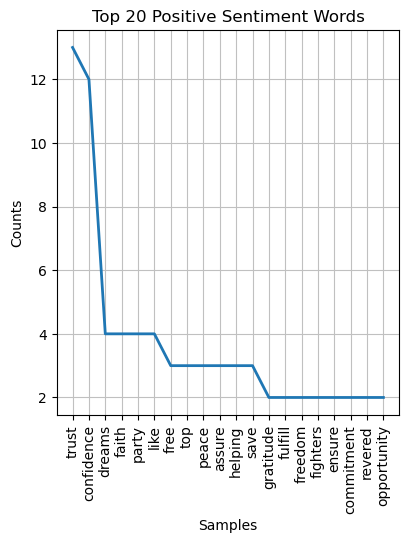

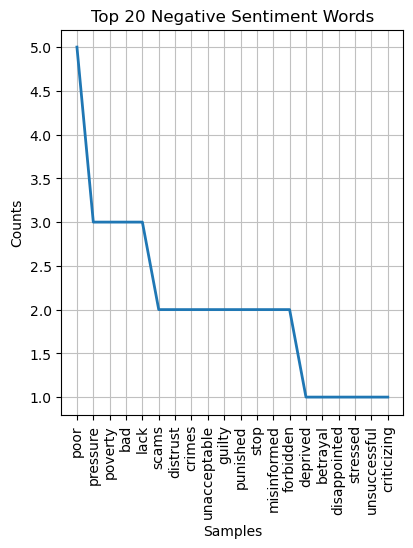

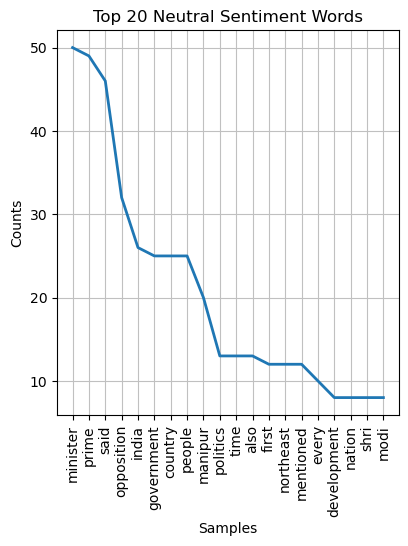

<Figure size 640x480 with 0 Axes>

In [59]:
plt.figure(figsize=(15,5))
plt.subplot(131)
word_freq_positive.plot(20, title='Top 20 Positive Sentiment Words')

plt.figure(figsize=(15,5))
plt.subplot(132)
word_freq_negative.plot(20, title='Top 20 Negative Sentiment Words')

plt.figure(figsize=(15,5))
plt.subplot(133)
word_freq_neutral.plot(20, title='Top 20 Neutral Sentiment Words')

plt.tight_layout()
plt.show()

In [60]:
df_positive = pd.DataFrame(word_freq_positive.most_common(20), columns=['Word', 'Frequency'])
df_negative = pd.DataFrame(word_freq_negative.most_common(20), columns=['Word', 'Frequency'])
df_neutral = pd.DataFrame(word_freq_neutral.most_common(20), columns=['Word','Frequency'])
print(df_positive)
print('*****************'*5)
print(df_negative)
print('*****************'*5)
print(df_neutral)
print('*****************'*5)

           Word  Frequency
0         trust         13
1    confidence         12
2        dreams          4
3         faith          4
4         party          4
5          like          4
6          free          3
7           top          3
8         peace          3
9        assure          3
10      helping          3
11         save          3
12    gratitude          2
13      fulfill          2
14      freedom          2
15     fighters          2
16       ensure          2
17   commitment          2
18      revered          2
19  opportunity          2
*************************************************************************************
            Word  Frequency
0           poor          5
1       pressure          3
2        poverty          3
3            bad          3
4           lack          3
5          scams          2
6       distrust          2
7         crimes          2
8   unacceptable          2
9         guilty          2
10      punished          2
11         

In [61]:
fig_positive = px.bar(df_positive, x='Word', y='Frequency', title='Top 20 Positive Sentiment Words')
fig_negative = px.bar(df_negative, x ='Word', y='Frequency', title='Top 20 Negative Sentiment Words')
fig_neutral = px.bar(df_negative, x ='Word', y='Frequency', title='Top 20 Neutral Sentiment Words')

fig_positive.show()
print()
fig_negative.show()
print()
fig_neutral.show()

In [62]:
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_positive)
wordcloud_negative = WordCloud(width=800, height=400, background_color='blue').generate_from_frequencies(word_freq_negative)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq_neutral)

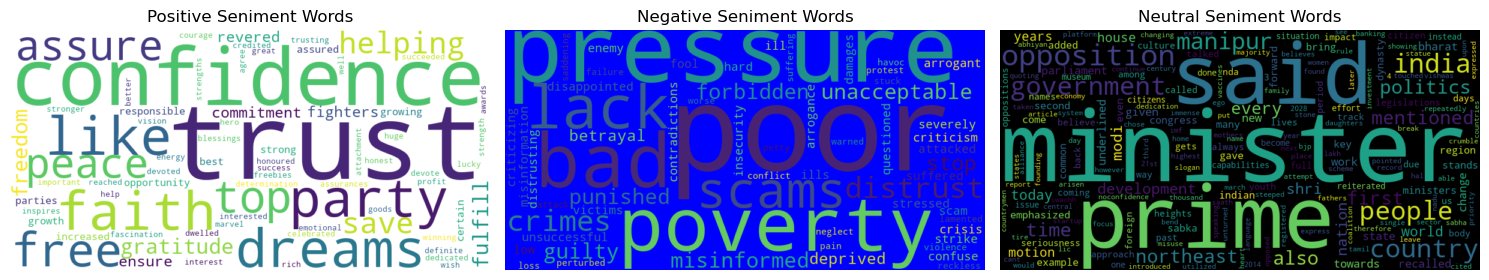

In [63]:
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Seniment Words')

plt.subplot(132)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Seniment Words')

plt.subplot(133)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Seniment Words')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Positive Seniment Words')

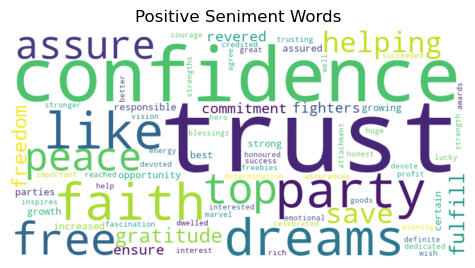

In [64]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Seniment Words')

Text(0.5, 1.0, 'Negative Seniment Words')

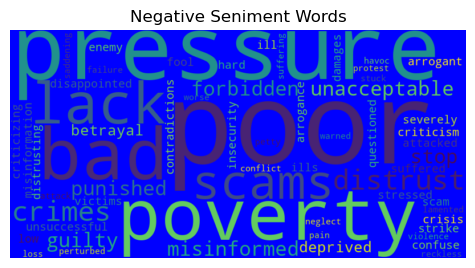

In [65]:
plt.figure(figsize=(20,5))
plt.subplot(132)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Seniment Words')

Text(0.5, 1.0, 'Neutral Seniment Words')

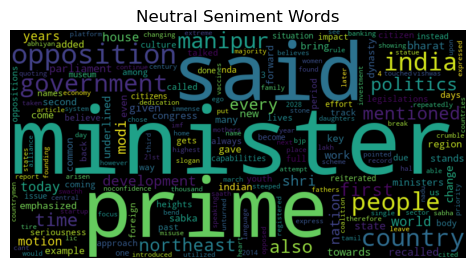

In [66]:
plt.figure(figsize=(20,5))
plt.subplot(133)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Seniment Words')

# israel_palestine_conflict

## Understand What's Behind the Isreal-Palestine Conflict

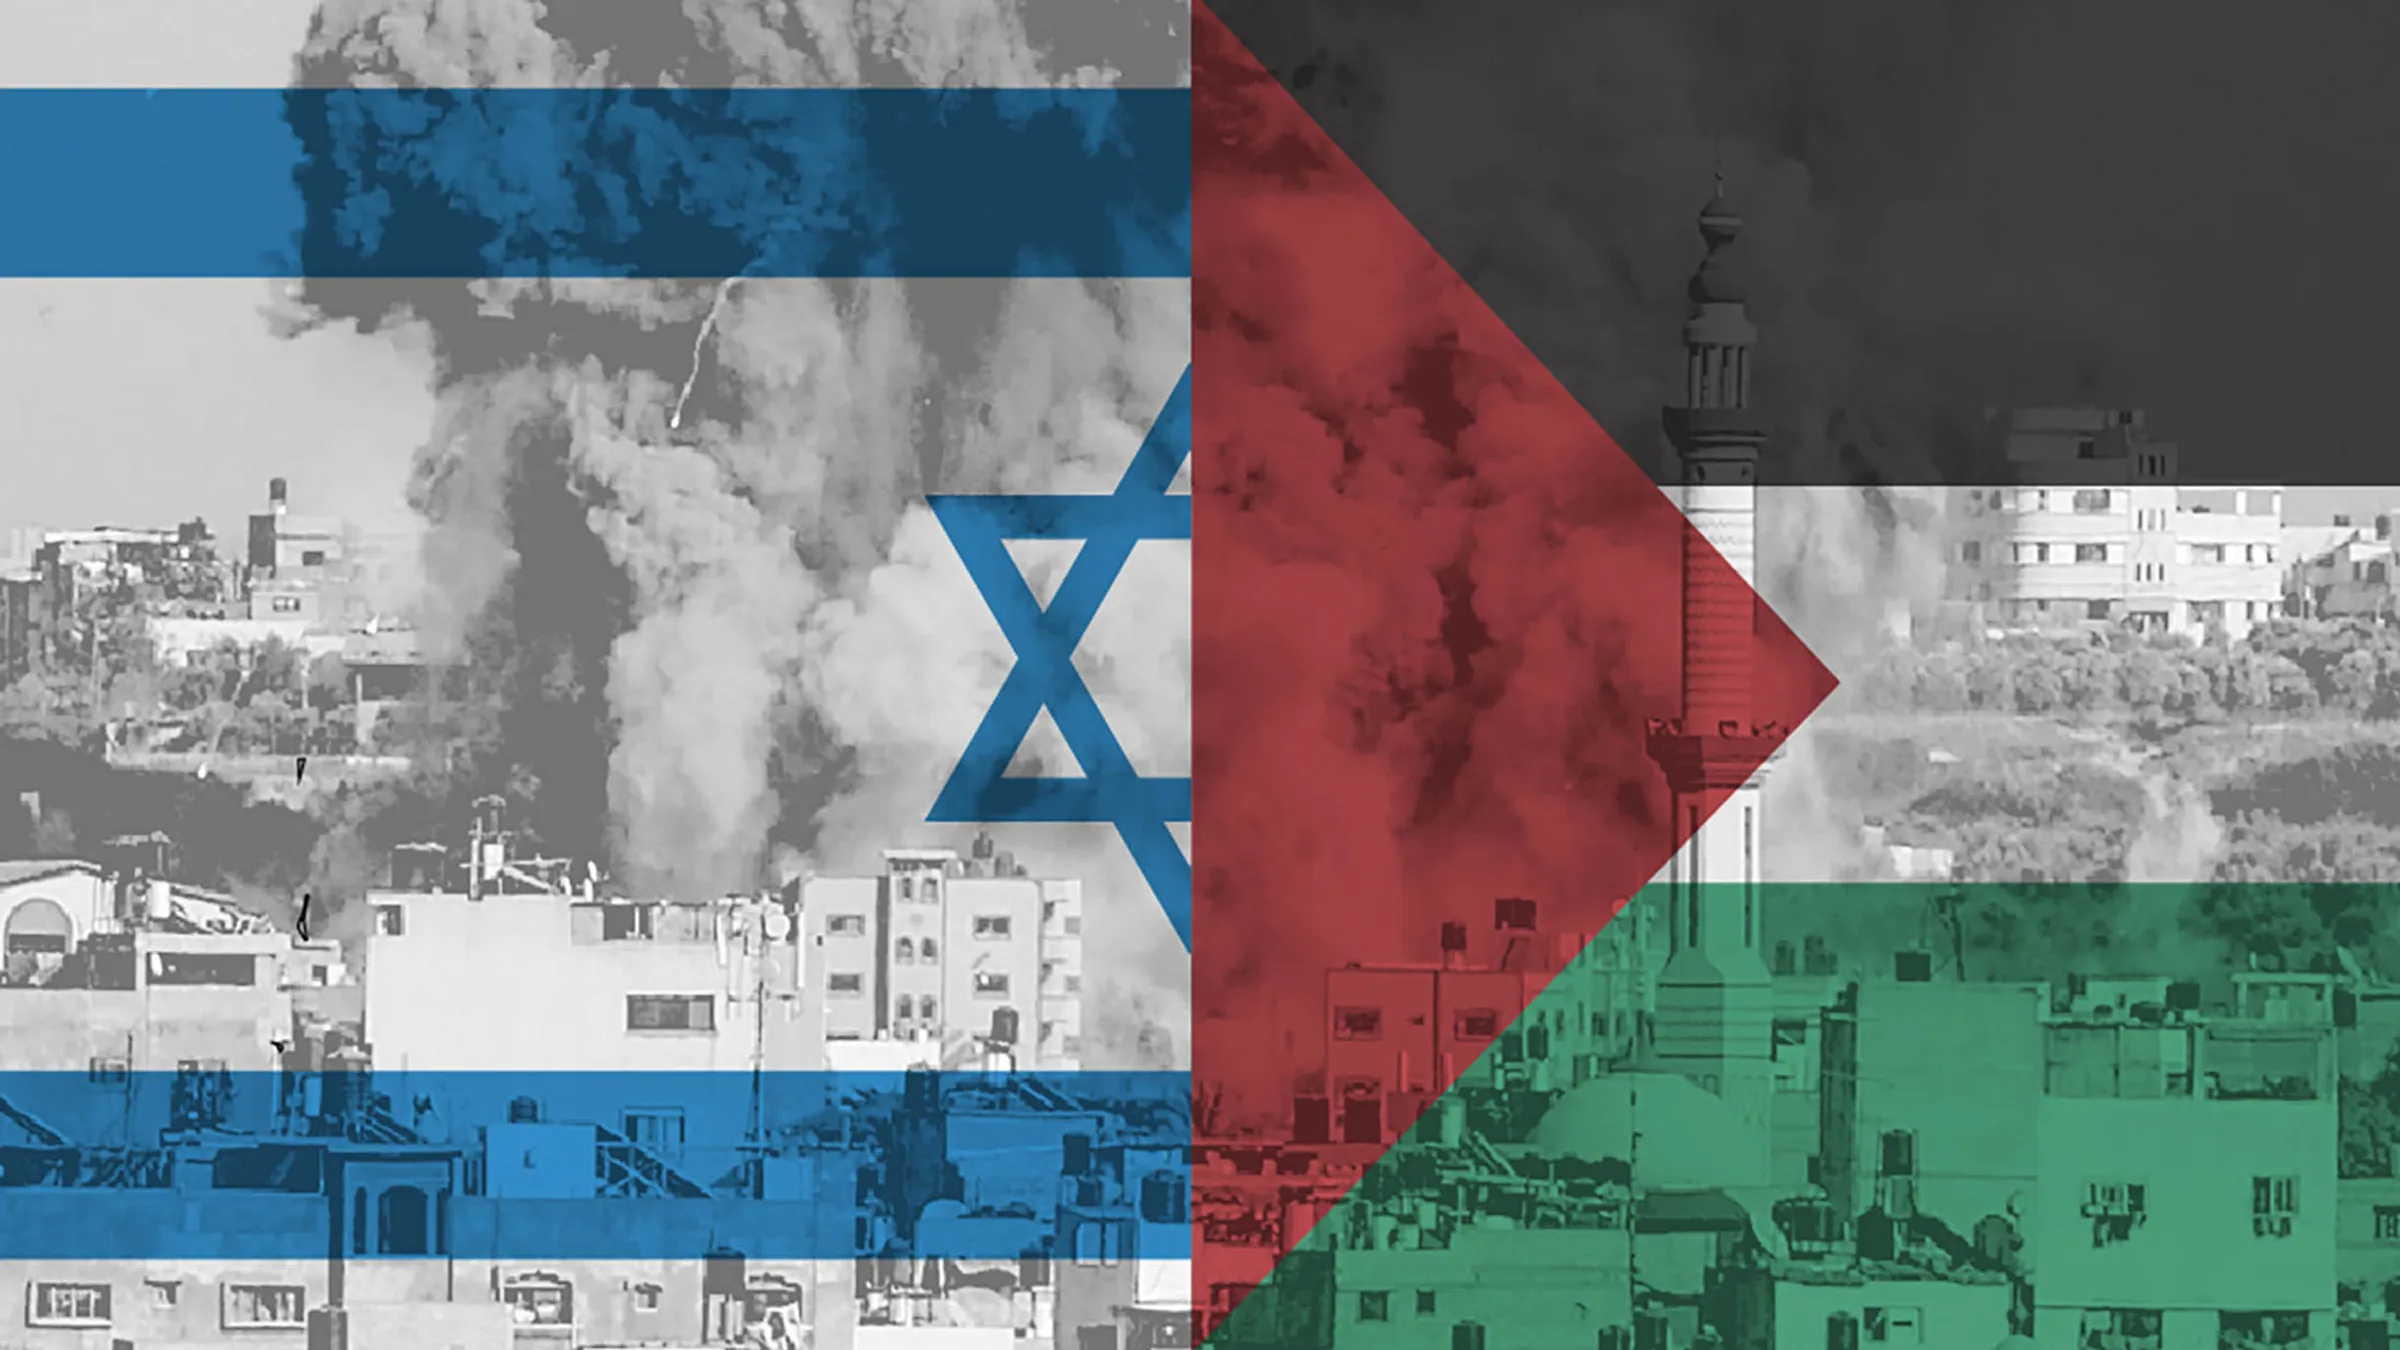

In [67]:
df = pd.read_csv('israel_palestine_conflict.csv')
df.head()

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,2000,DECEMBER,781.0,NaN,51,8
1,2000,NOVEMBER,3838.0,NaN,112,22
2,2000,OCTOBER,5984.0,NaN,104,10
3,2000,SEPTEMBER,NaN,NaN,16,1
4,2001,DECEMBER,304.0,NaN,67,36


In [68]:
df.isnull().sum()

Year                       0
Month                      0
Palestinians Injuries     56
Israelis Injuries        119
Palestinians Killed        0
Israelis Killed            0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   249 non-null    int64  
 1   Month                  249 non-null    object 
 2   Palestinians Injuries  193 non-null    float64
 3   Israelis Injuries      130 non-null    float64
 4   Palestinians Killed    249 non-null    int64  
 5   Israelis Killed        249 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 11.8+ KB


In [70]:
df.fillna({'Palestinians Injuries':'0','Israelis Injuries':'0'})

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,2000,DECEMBER,781.0,0,51,8
1,2000,NOVEMBER,3838.0,0,112,22
2,2000,OCTOBER,5984.0,0,104,10
3,2000,SEPTEMBER,0,0,16,1
4,2001,DECEMBER,304.0,0,67,36
...,...,...,...,...,...,...
244,2021,JANUARY,0,0,4,0
245,2021,FEBRUARY,0,0,1,0
246,2021,MARCH,0,0,4,0
247,2021,APRIL,0,0,1,0


In [71]:
df = df.fillna({'Palestinians Injuries':'0'})

In [72]:
df = df.fillna({'Israelis Injuries':'0'})

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   249 non-null    int64 
 1   Month                  249 non-null    object
 2   Palestinians Injuries  249 non-null    object
 3   Israelis Injuries      249 non-null    object
 4   Palestinians Killed    249 non-null    int64 
 5   Israelis Killed        249 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 11.8+ KB


In [74]:
df.head()

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,2000,DECEMBER,781.0,0,51,8
1,2000,NOVEMBER,3838.0,0,112,22
2,2000,OCTOBER,5984.0,0,104,10
3,2000,SEPTEMBER,0,0,16,1
4,2001,DECEMBER,304.0,0,67,36


In [75]:
numerical_columns = ['Palestinians Injuries','Israelis Injuries','Palestinians Killed','Israelis Killed']
df[numerical_columns] = df[numerical_columns].replace({',':''}, regex=True)
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   249 non-null    int64  
 1   Month                  249 non-null    object 
 2   Palestinians Injuries  249 non-null    float64
 3   Israelis Injuries      249 non-null    float64
 4   Palestinians Killed    249 non-null    int64  
 5   Israelis Killed        249 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 11.8+ KB


In [76]:
df.tail()

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
244,2021,JANUARY,0.0,0.0,4,0
245,2021,FEBRUARY,0.0,0.0,1,0
246,2021,MARCH,0.0,0.0,4,0
247,2021,APRIL,0.0,0.0,1,0
248,2021,MAY,0.0,0.0,26,3


In [77]:
df.describe()

,Year,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
count,249.000000,249.000000,249.000000,249.000000,249.000000
mean,2010.542169,447.690763,20.722892,40.160643,5.120482
std,6.014702,1466.407720,149.791924,129.148851,11.653323
min,2000.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,46.000000,0.000000,4.000000,0.000000
50%,2011.000000,160.000000,2.000000,12.000000,1.000000
75%,2016.000000,302.000000,15.000000,37.000000,5.000000
max,2021.000000,13735.000000,2347.000000,1590.000000,122.000000


In [78]:
df.nunique()

Year                      22
Month                     14
Palestinians Injuries    169
Israelis Injuries         53
Palestinians Killed       77
Israelis Killed           33
dtype: int64

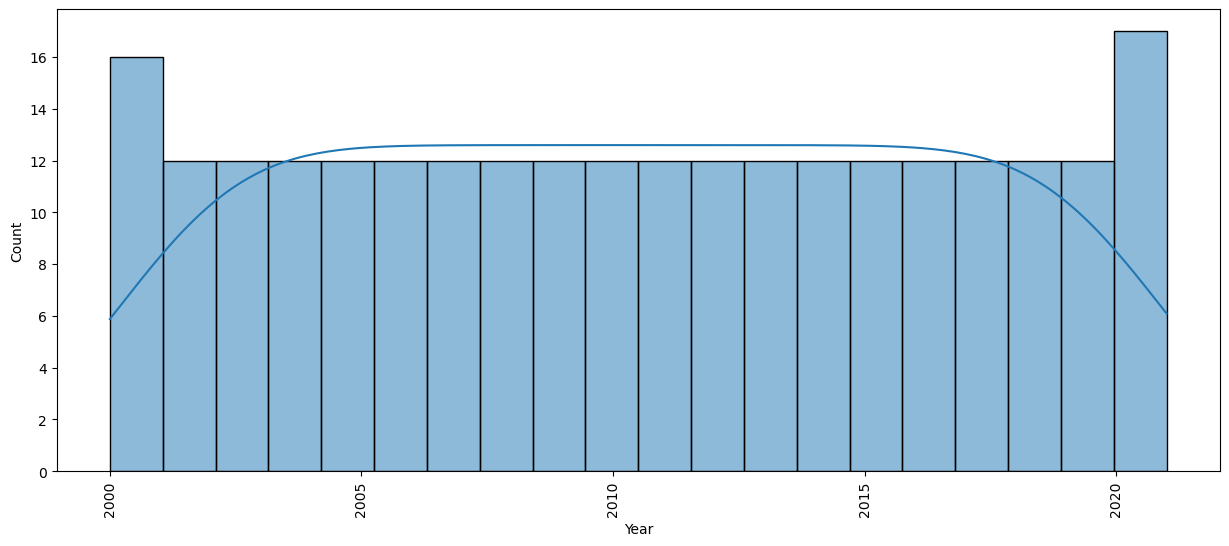

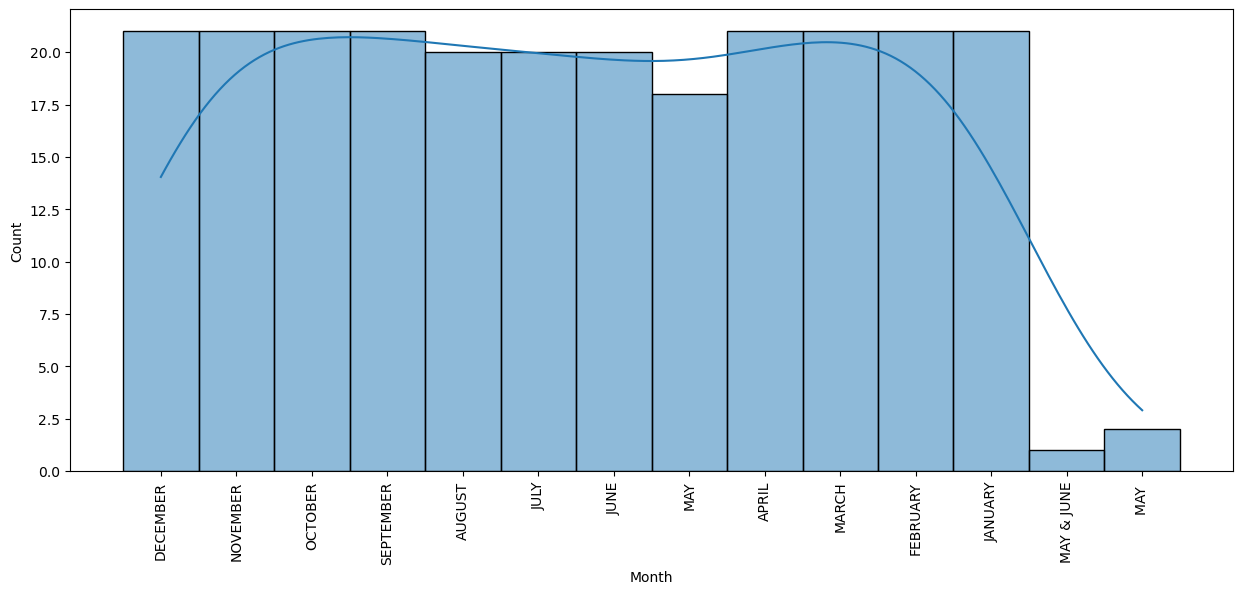

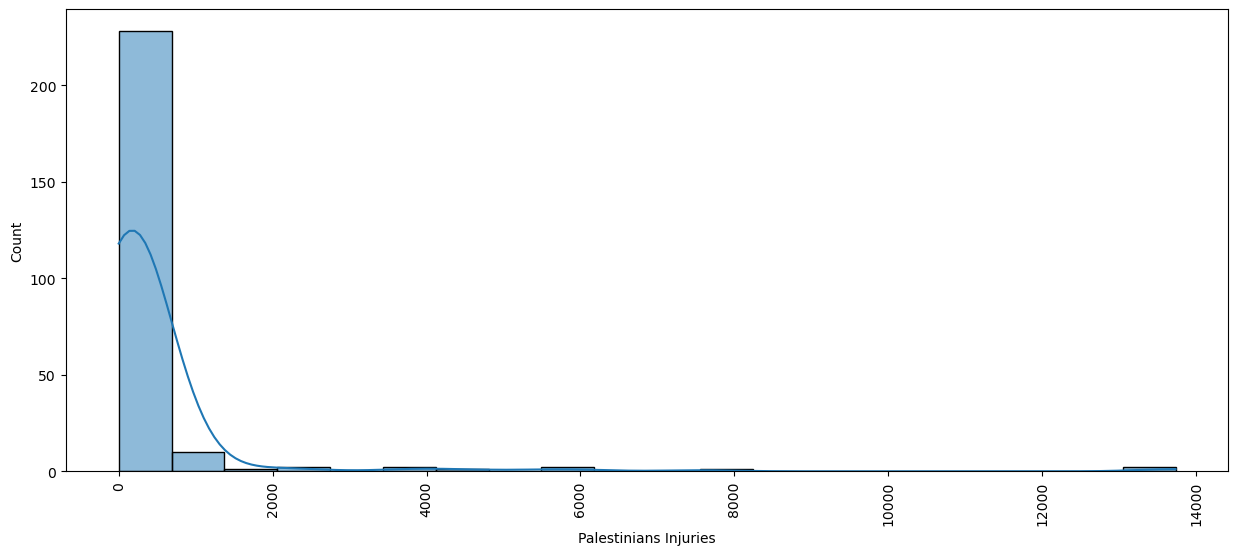

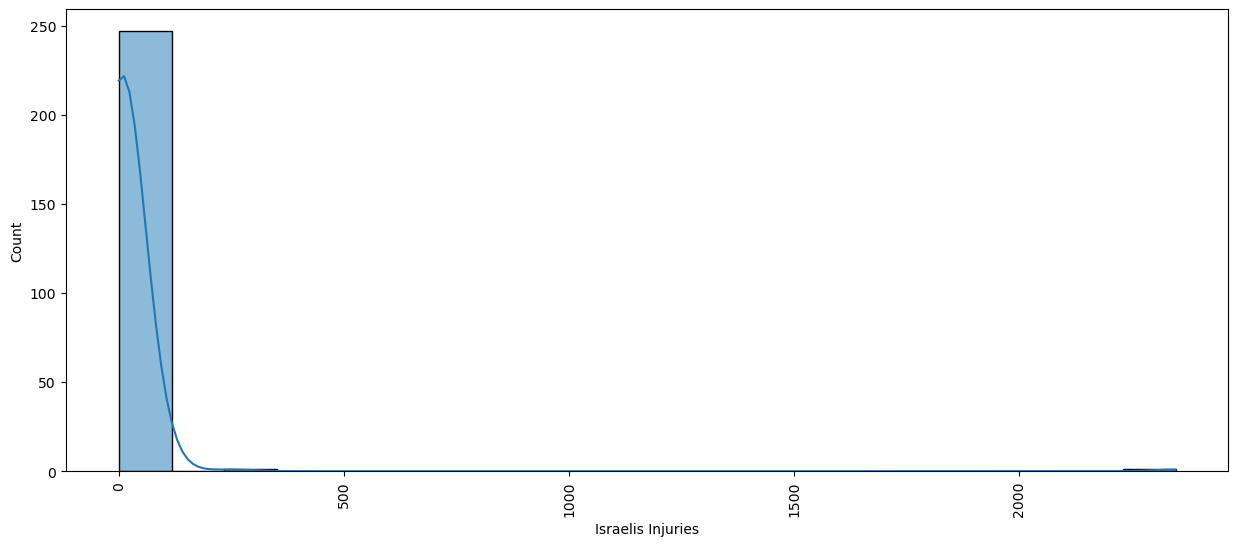

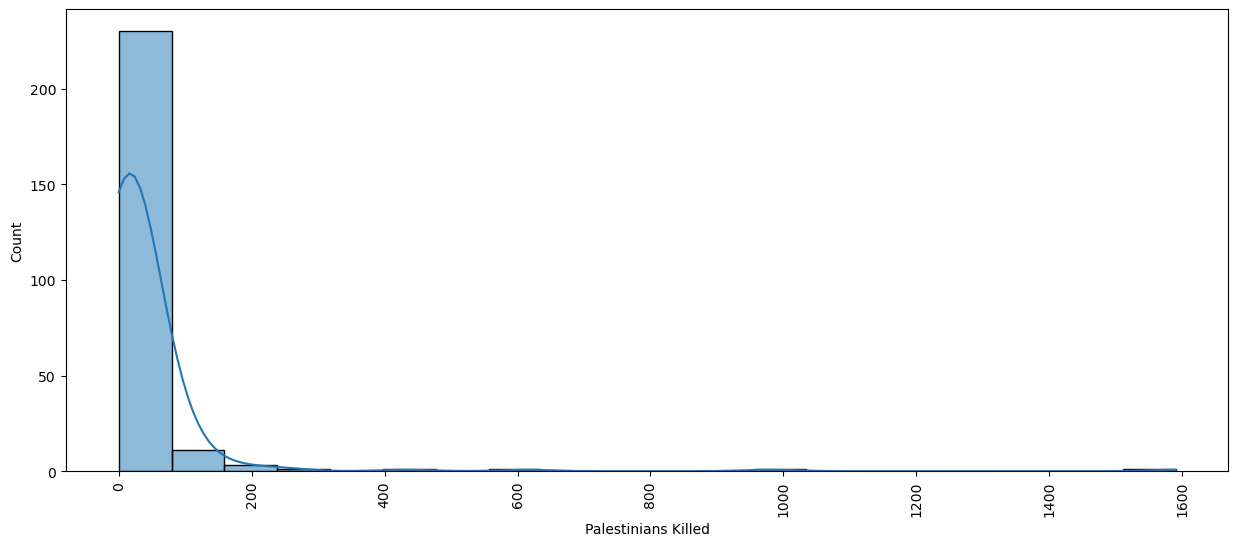

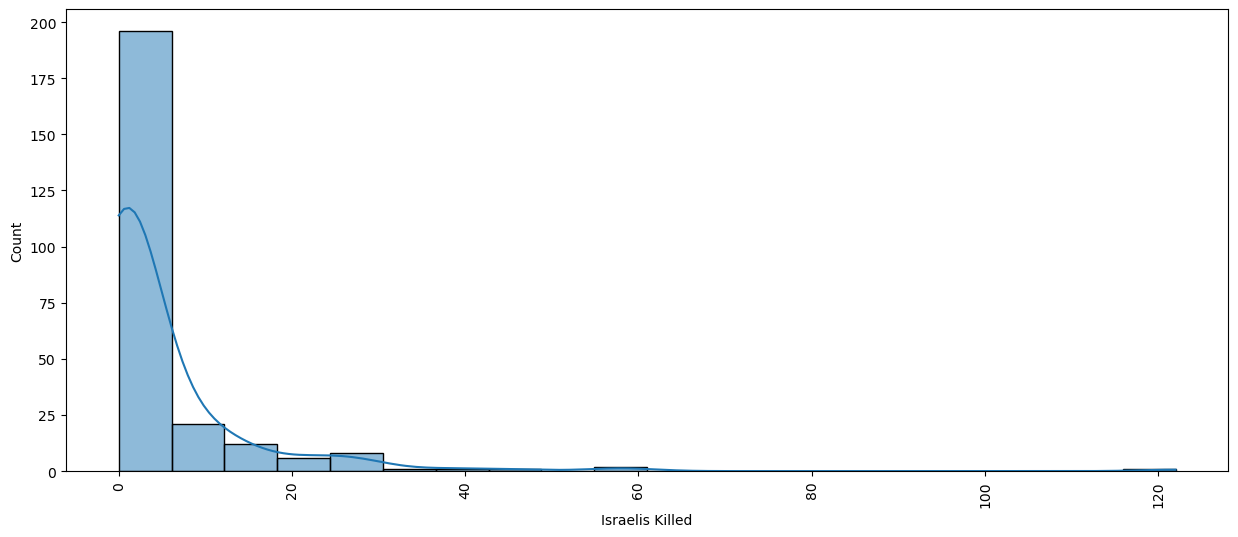

In [79]:
for i in df.columns:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], kde=True, bins=20, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

In [80]:
df.columns

Index(['Year', 'Month', 'Palestinians Injuries', 'Israelis Injuries',
       'Palestinians Killed', 'Israelis Killed'],
      dtype='object')

In [81]:
df1 = df[['Year', 'Palestinians Injuries','Israelis Injuries','Palestinians Killed','Israelis Killed']]
df1

,Year,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,2000,781.0,0.0,51,8
1,2000,3838.0,0.0,112,22
2,2000,5984.0,0.0,104,10
3,2000,0.0,0.0,16,1
4,2001,304.0,0.0,67,36
...,...,...,...,...,...
244,2021,0.0,0.0,4,0
245,2021,0.0,0.0,1,0
246,2021,0.0,0.0,4,0
247,2021,0.0,0.0,1,0


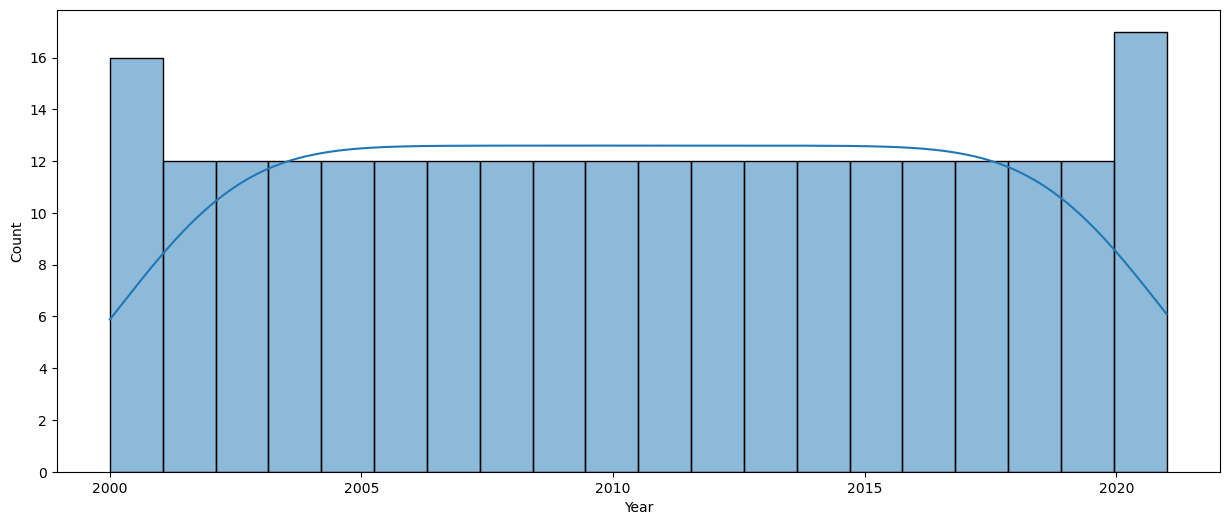

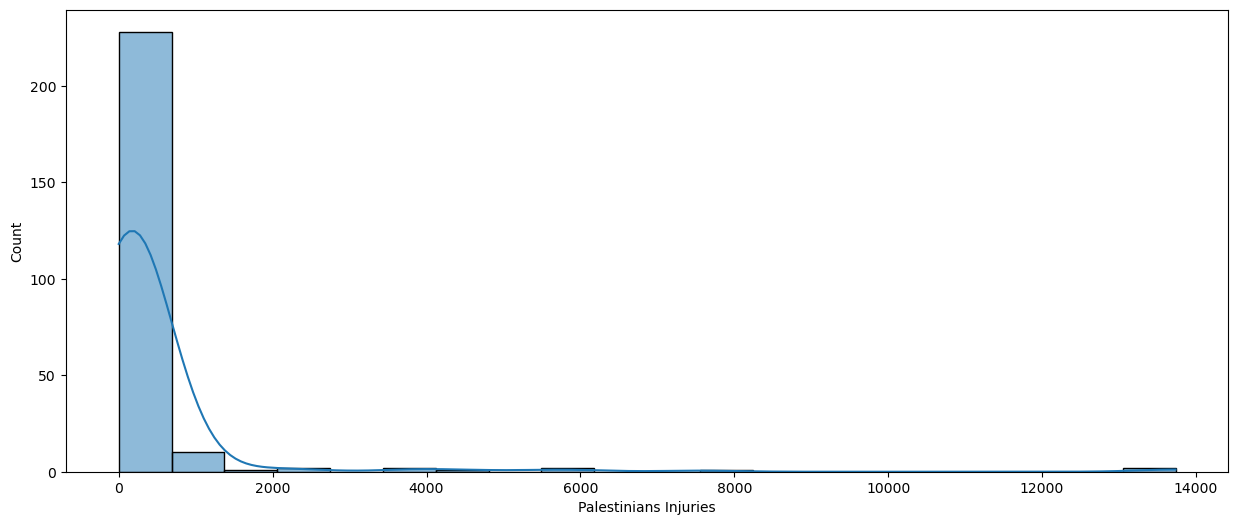

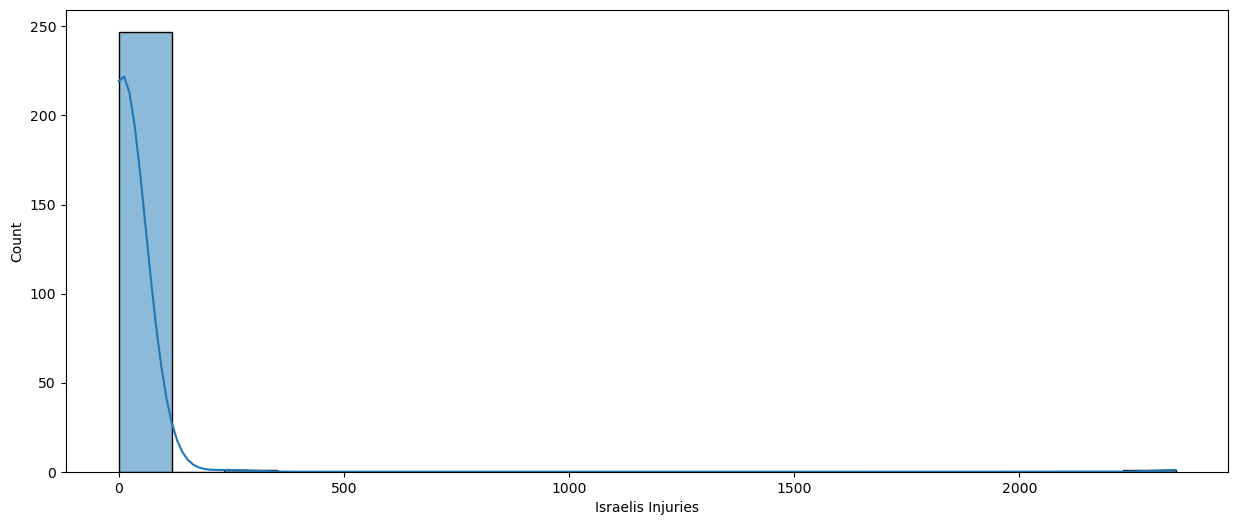

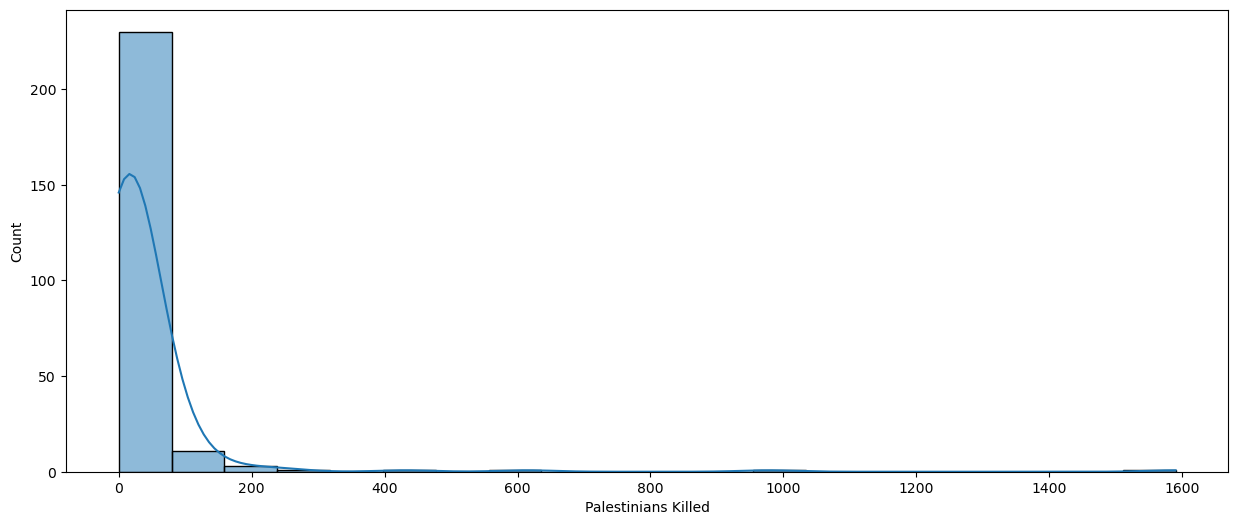

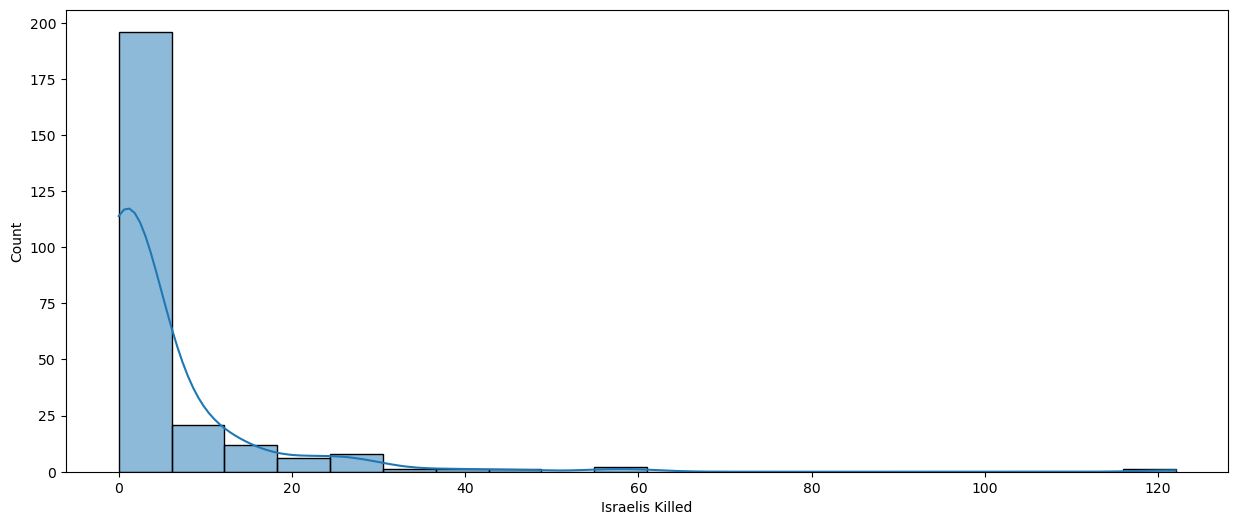

In [82]:
for i in df1.columns:
    plt.figure(figsize=(15,6))
    sns.histplot(df1[i], kde=True, bins=20)
    plt.xticks(rotation = 0)
    plt.show()

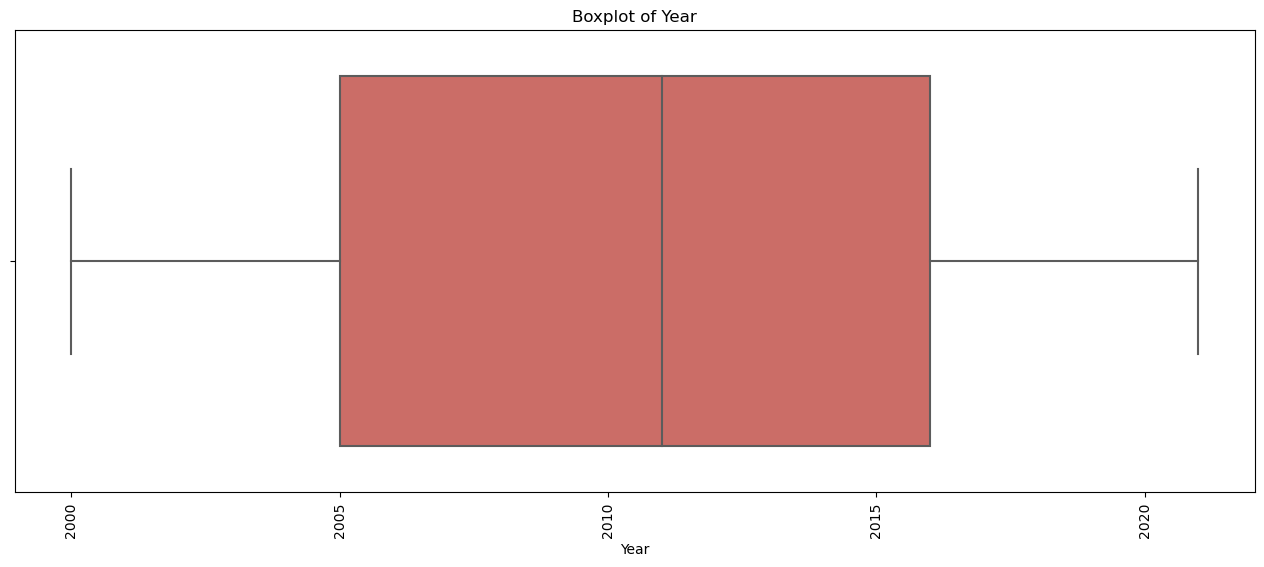

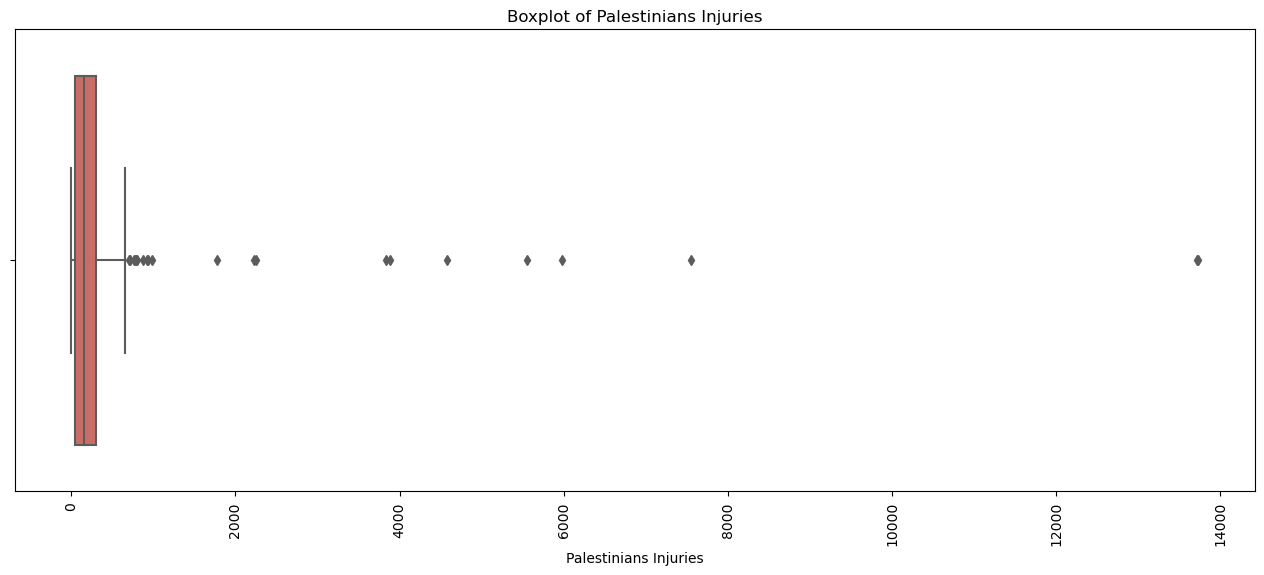

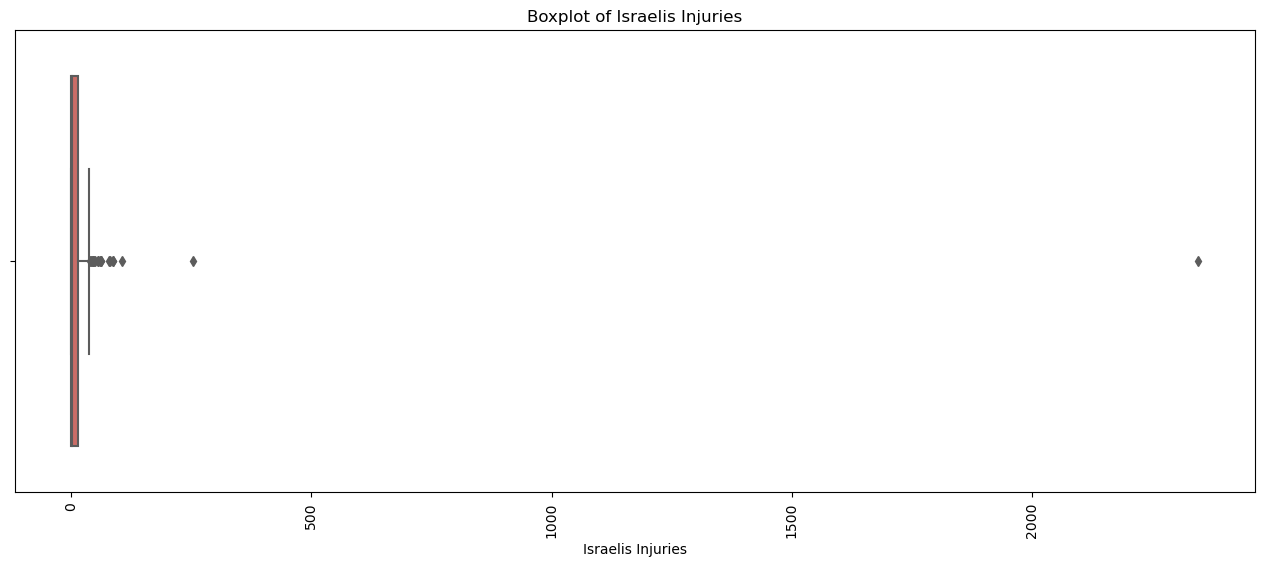

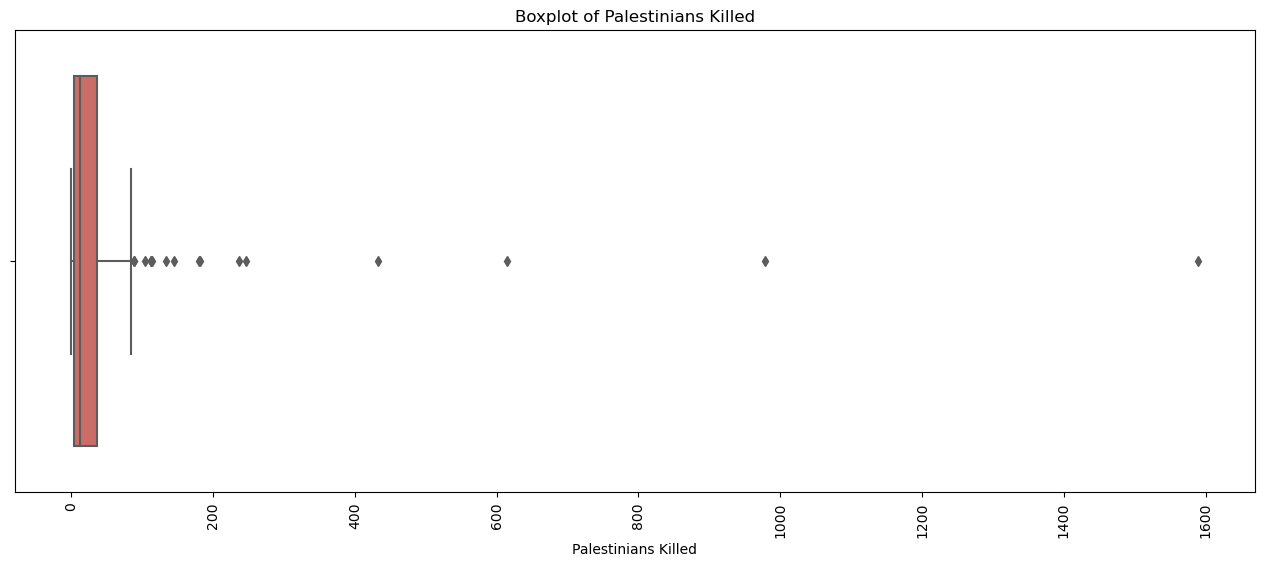

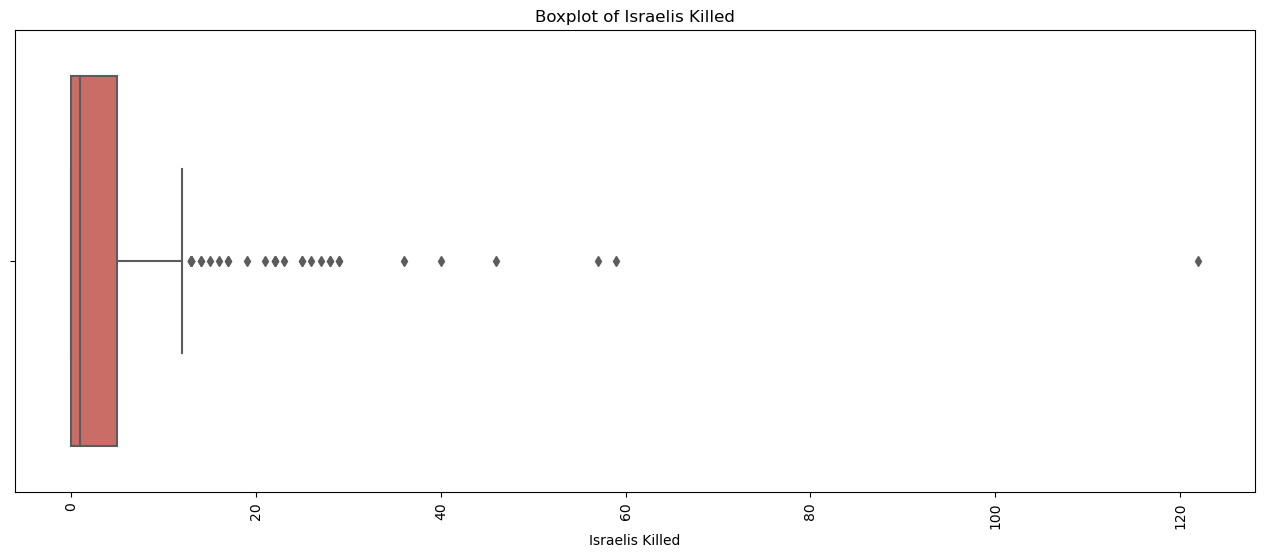

In [83]:
for i in df1.columns:
    plt.figure(figsize=(16,6))
    sns.boxplot(x=df1[i], palette='hls')
    plt.xticks(rotation=90)
    plt.title(f'Boxplot of {i}')
    plt.show()

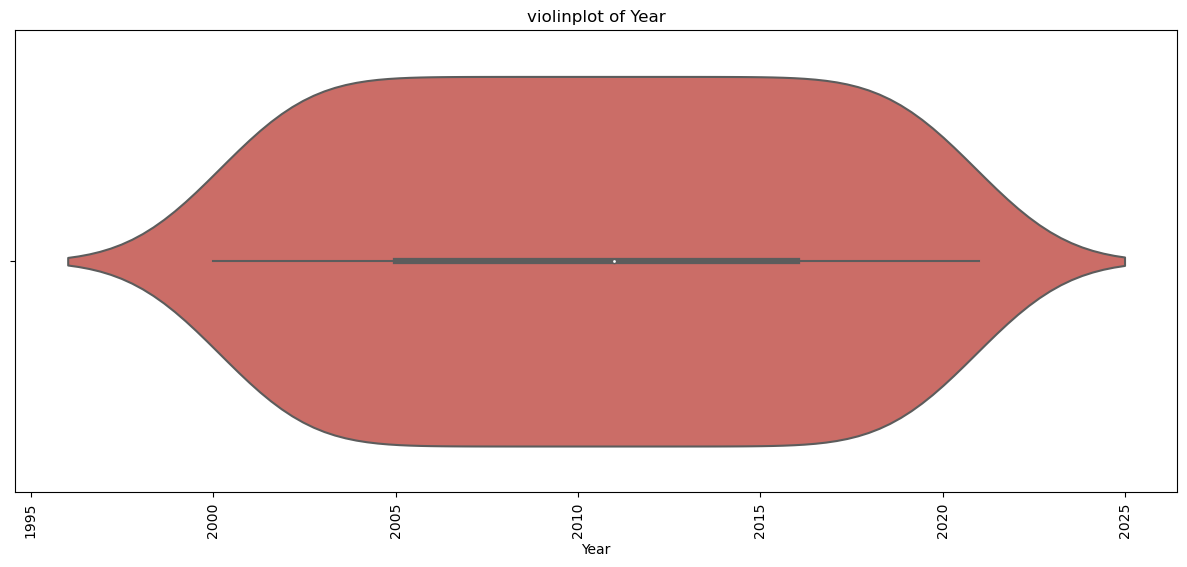

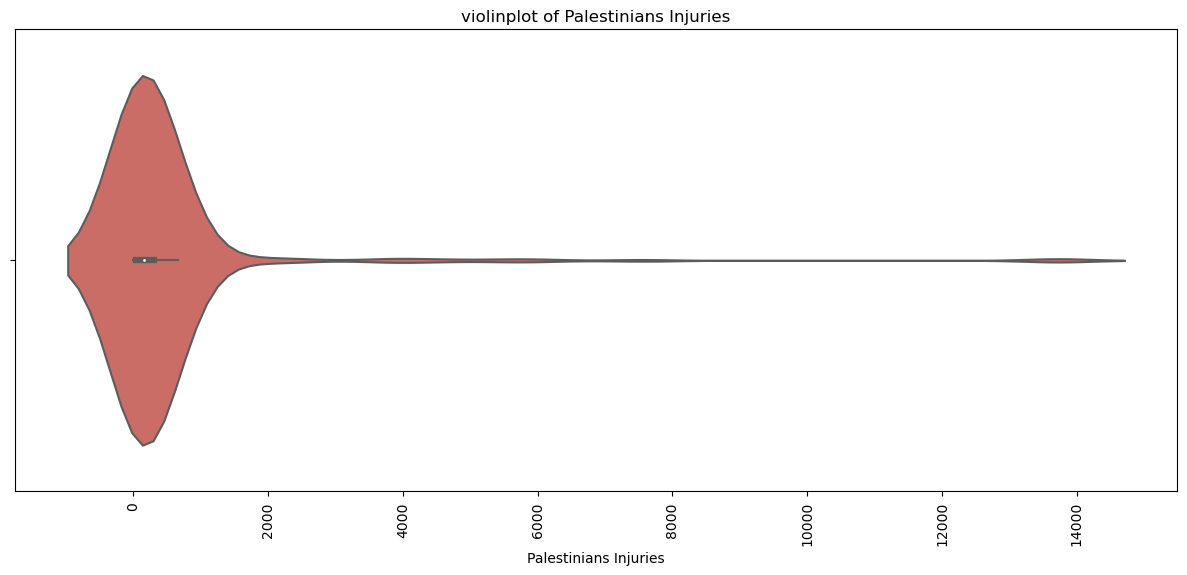

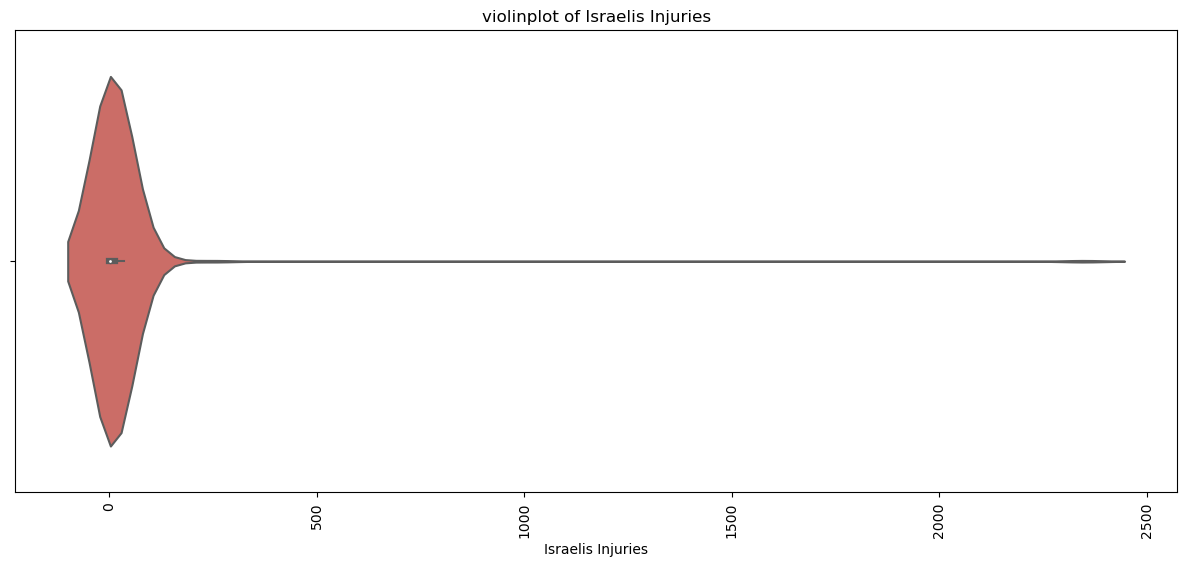

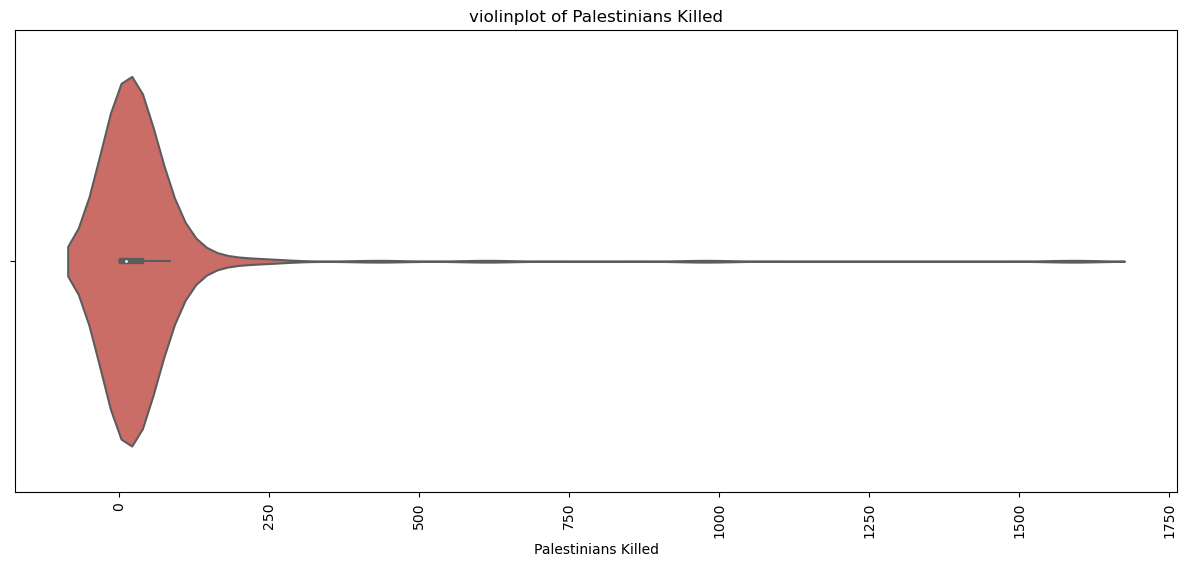

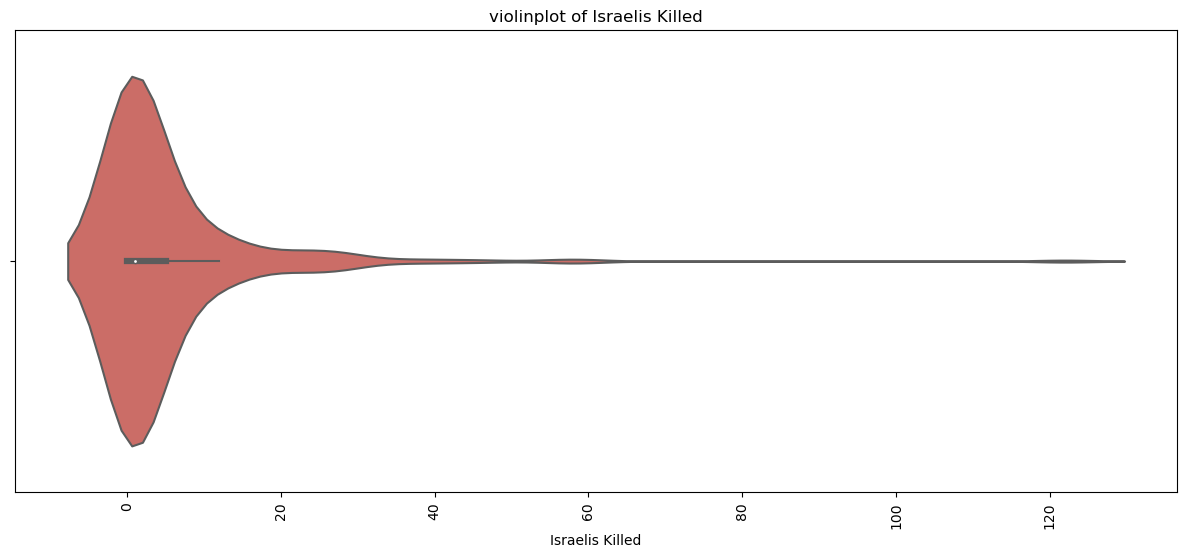

In [84]:
for i in df1.columns:
    plt.figure(figsize=(15,6))
    sns.violinplot(x=df1[i], palette='hls')
    plt.xticks(rotation=90)
    plt.title(f'violinplot of {i}')
    plt.show()

In [85]:
import plotly.express as px
import plotly.graph_objects as go

In [86]:
for i in df.columns:
    fig = go.Figure(data=[go.Histogram(x=df[i])])
    fig.update_layout(title=i, xaxis_title=i, yaxis_title='Value')
    fig.show()

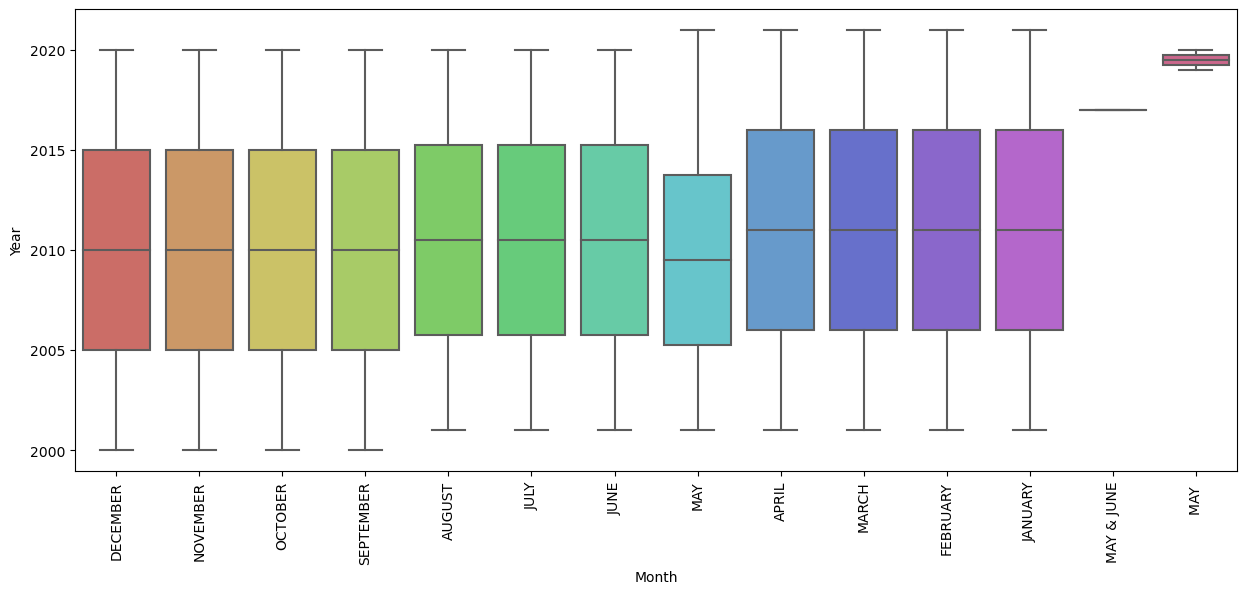

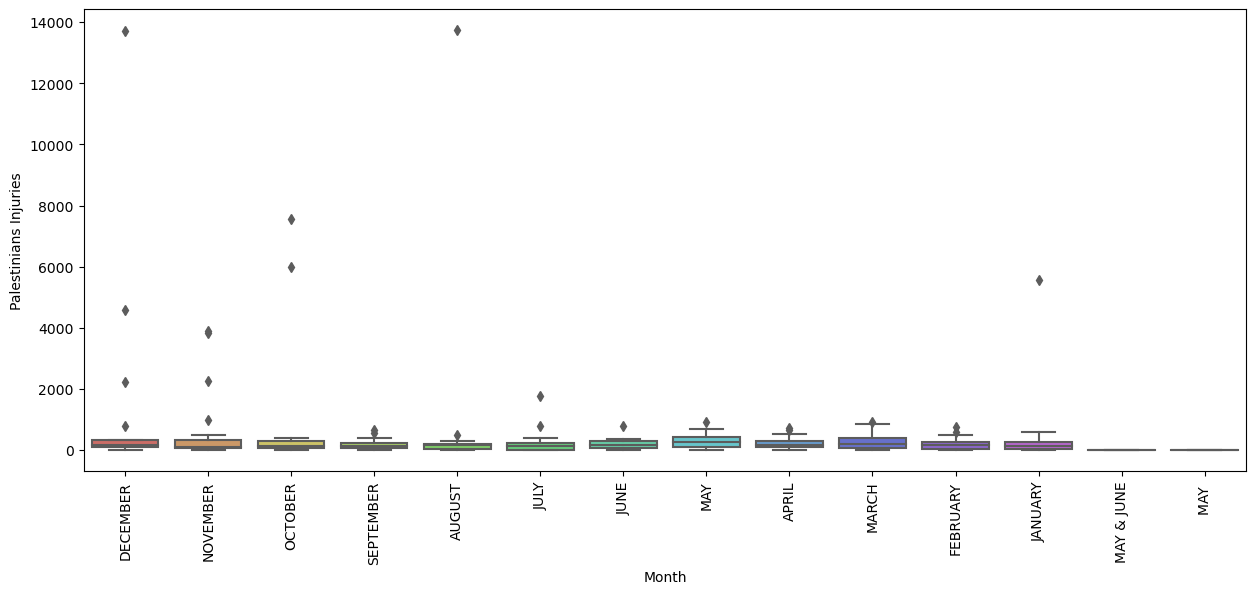

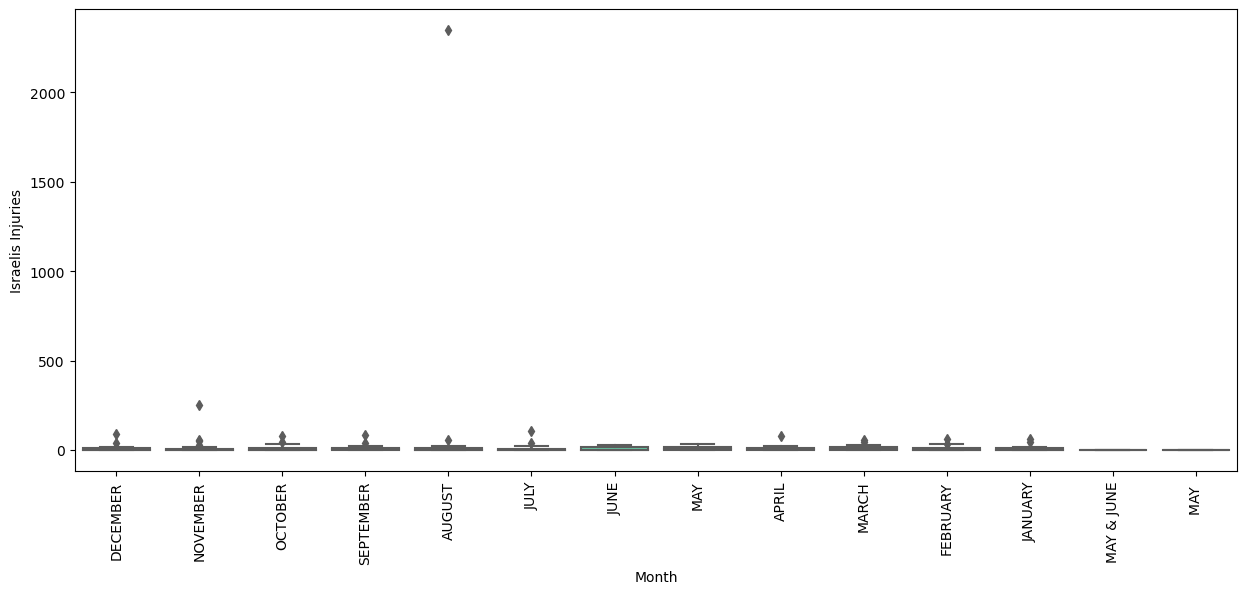

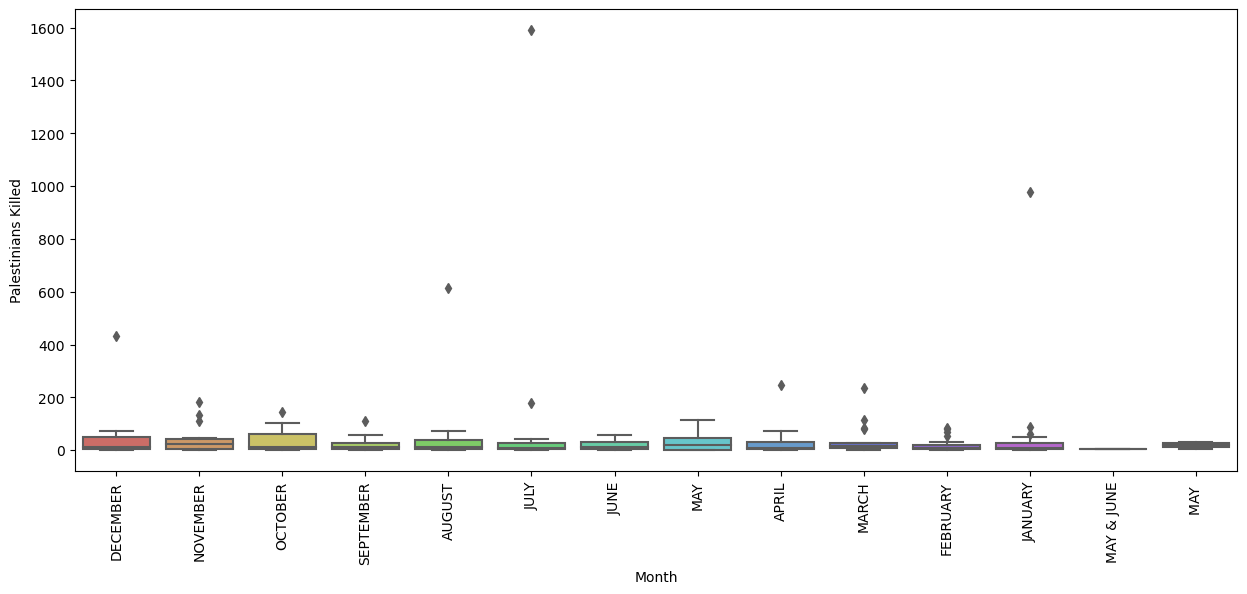

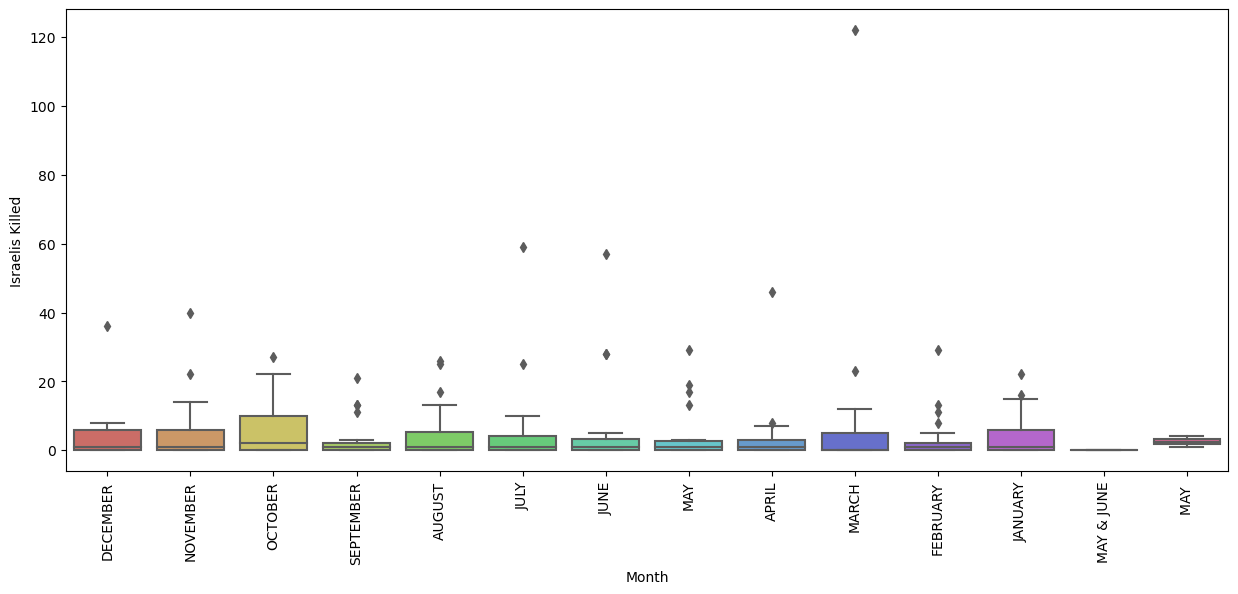

In [87]:
for i in df1.columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(x = df['Month'], y = df[i], data = df, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

In [88]:
df.columns

Index(['Year', 'Month', 'Palestinians Injuries', 'Israelis Injuries',
       'Palestinians Killed', 'Israelis Killed'],
      dtype='object')

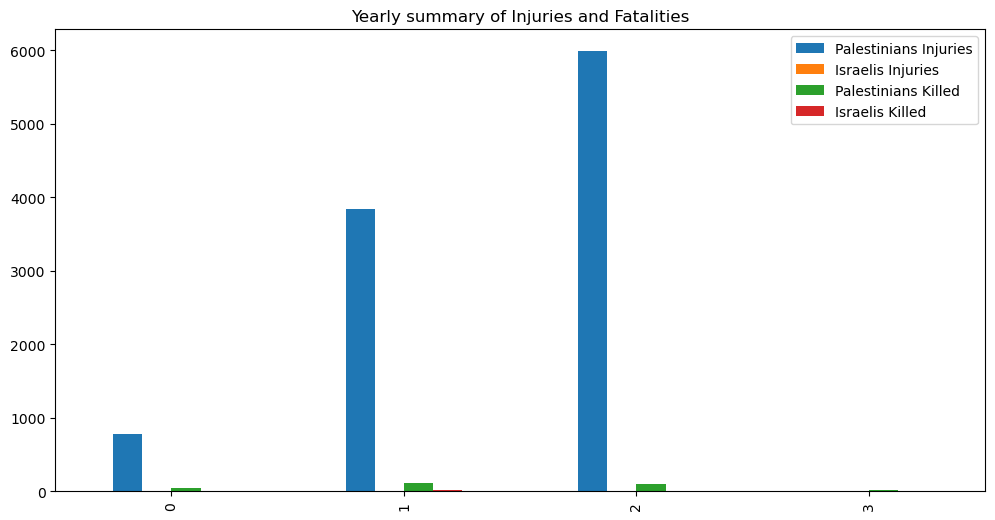

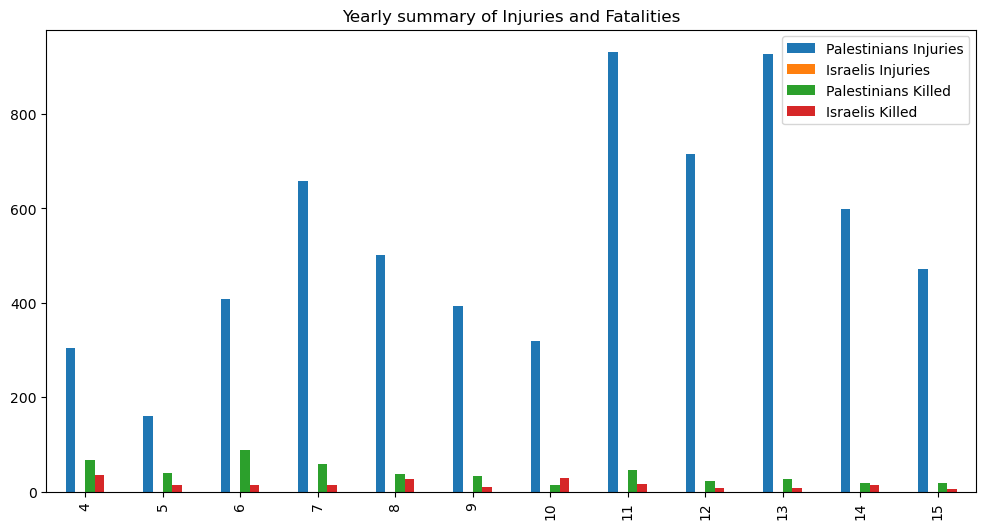

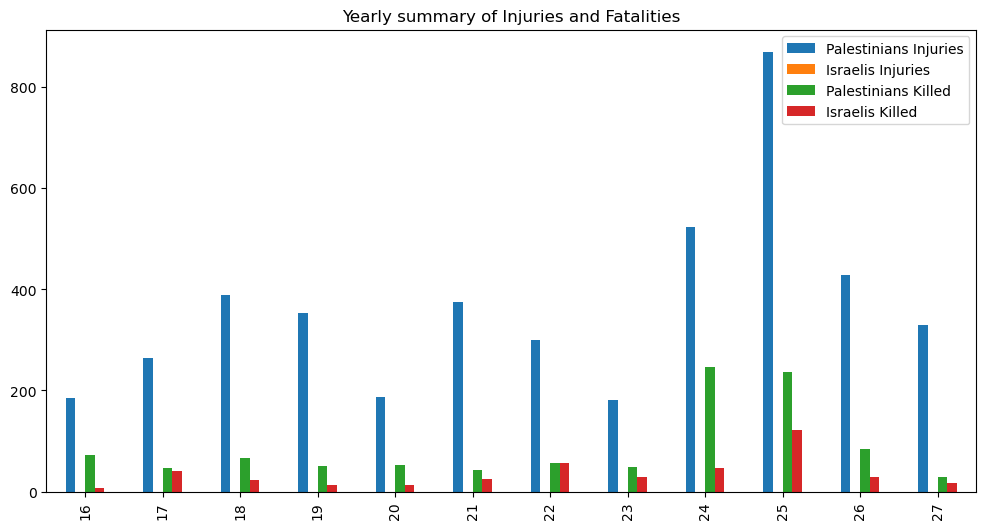

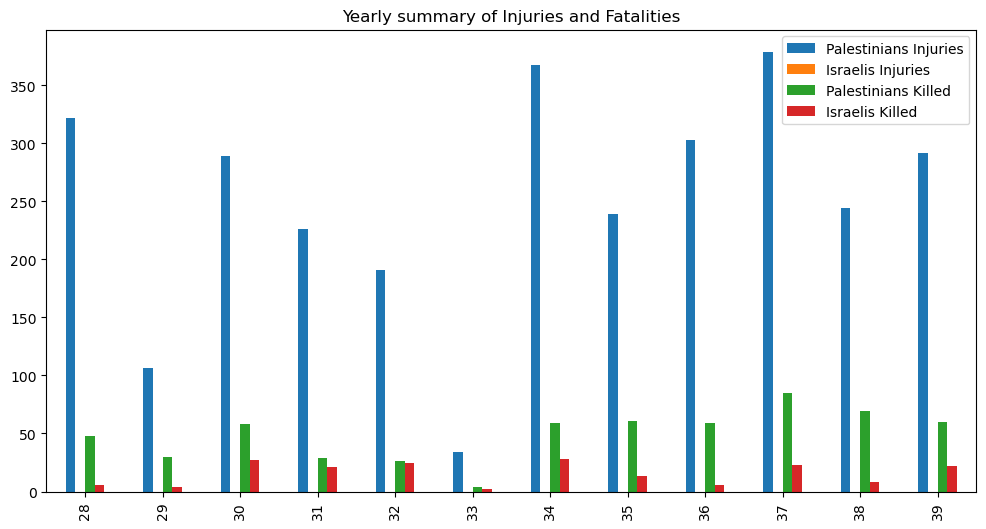

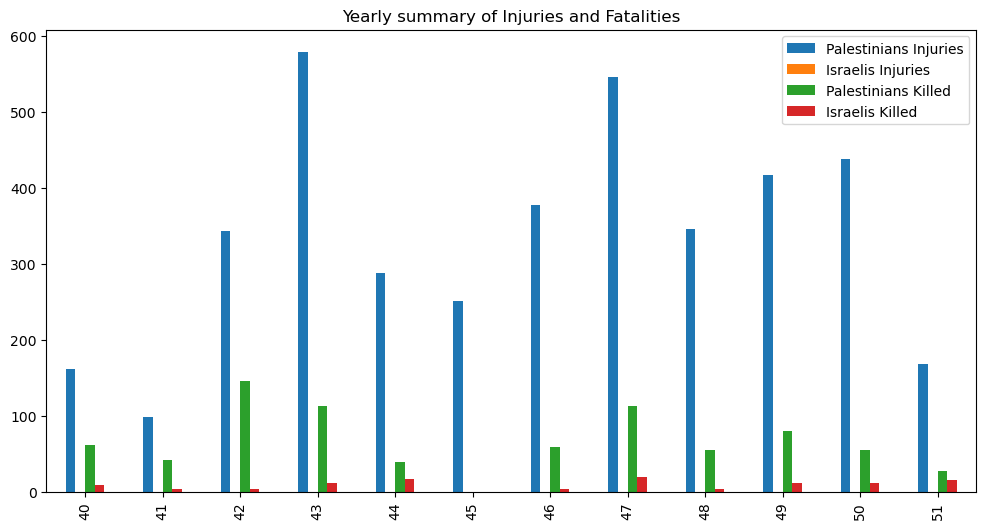

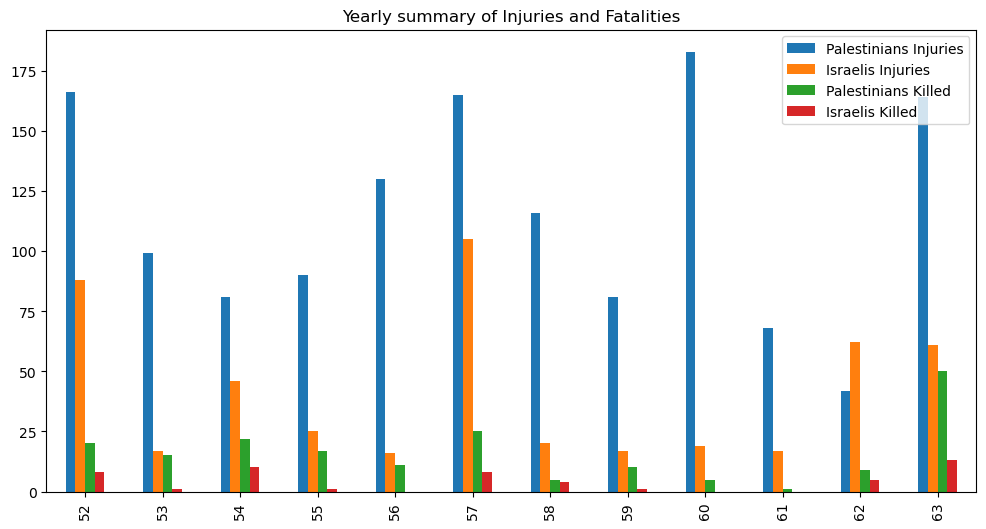

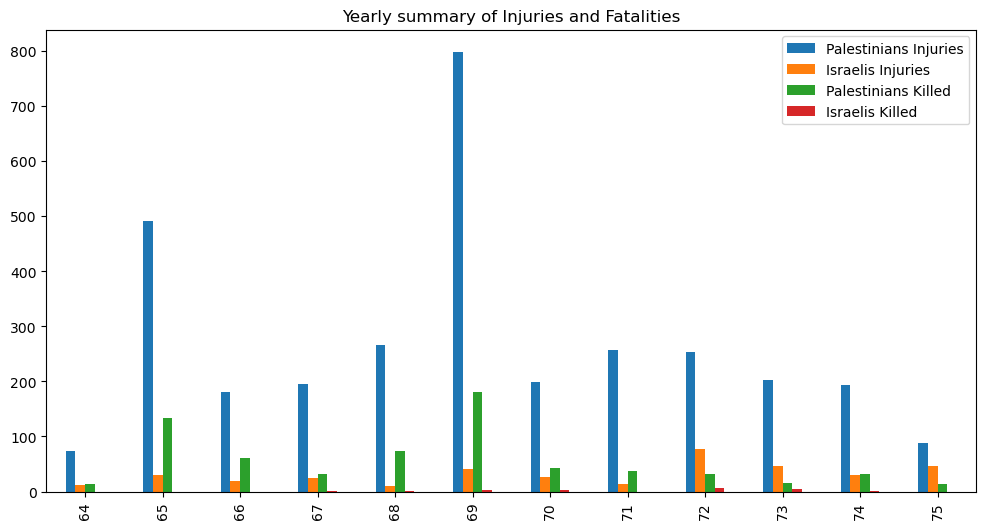

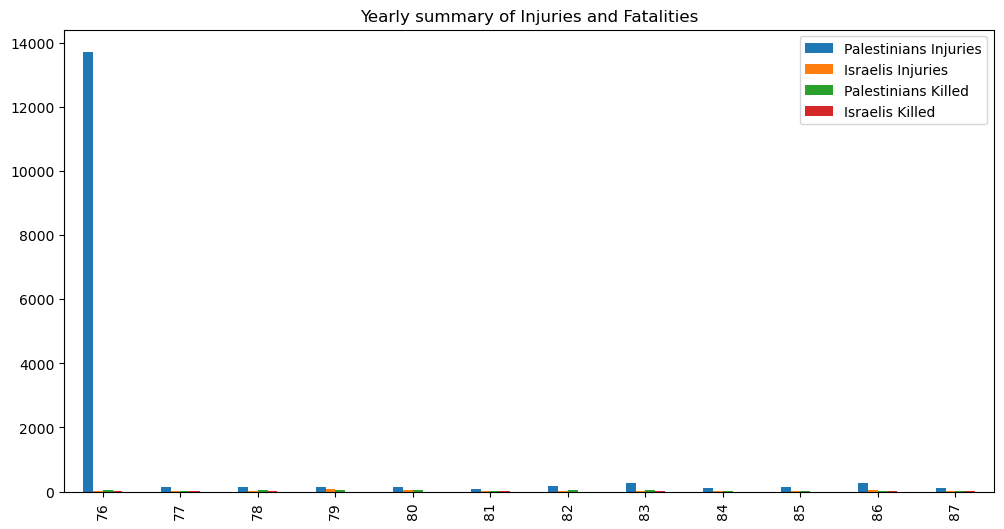

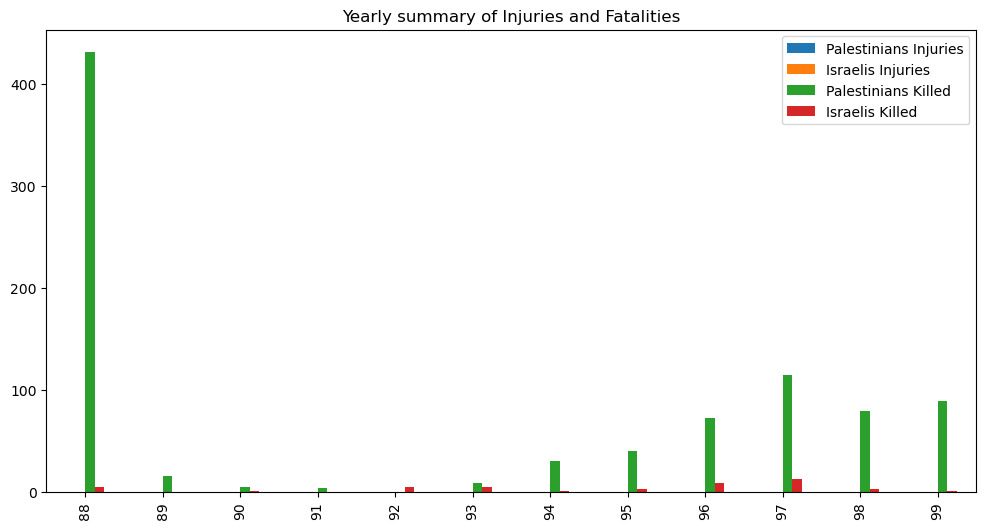

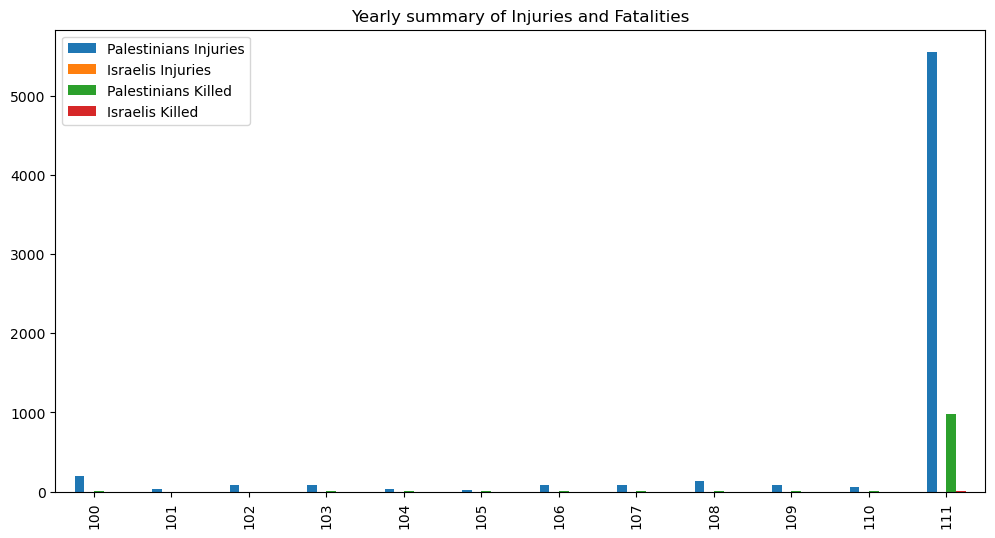

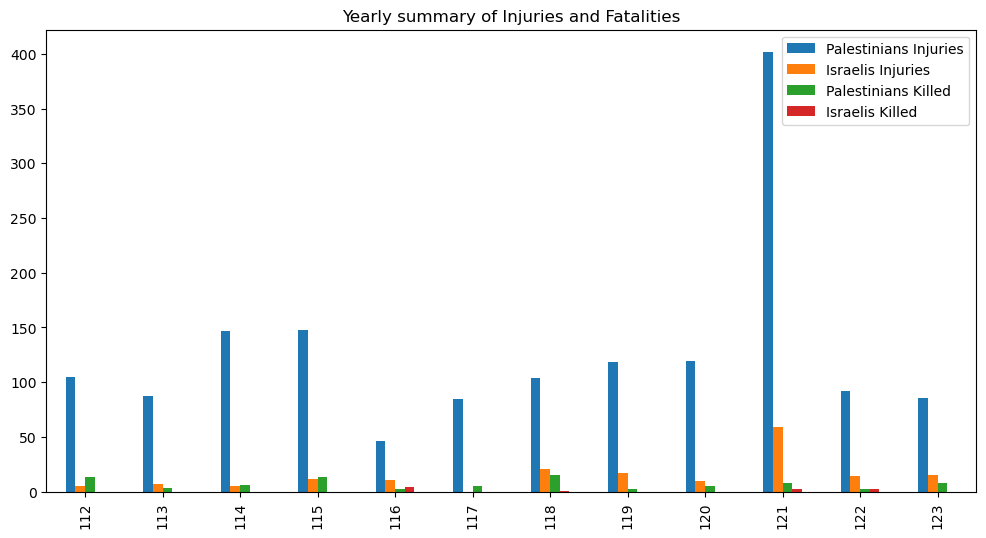

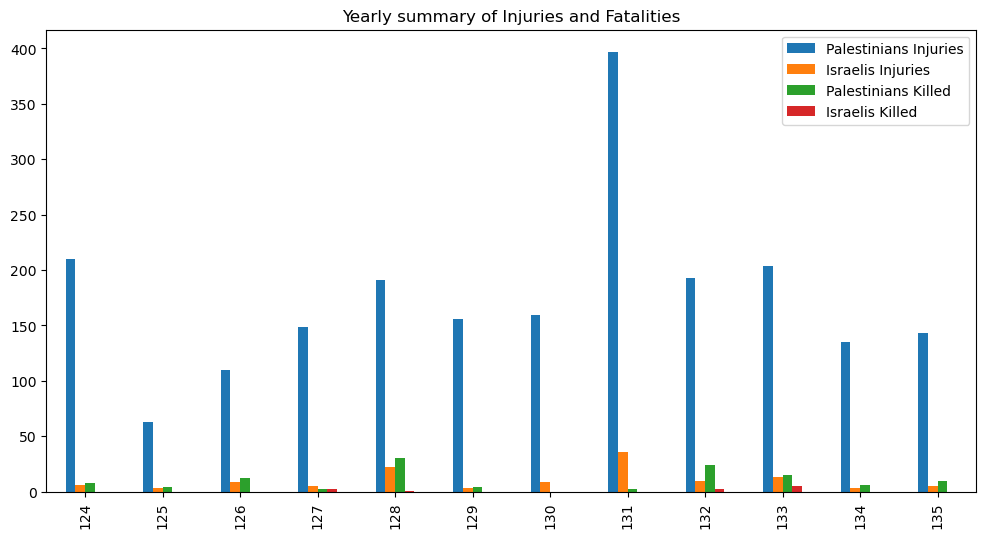

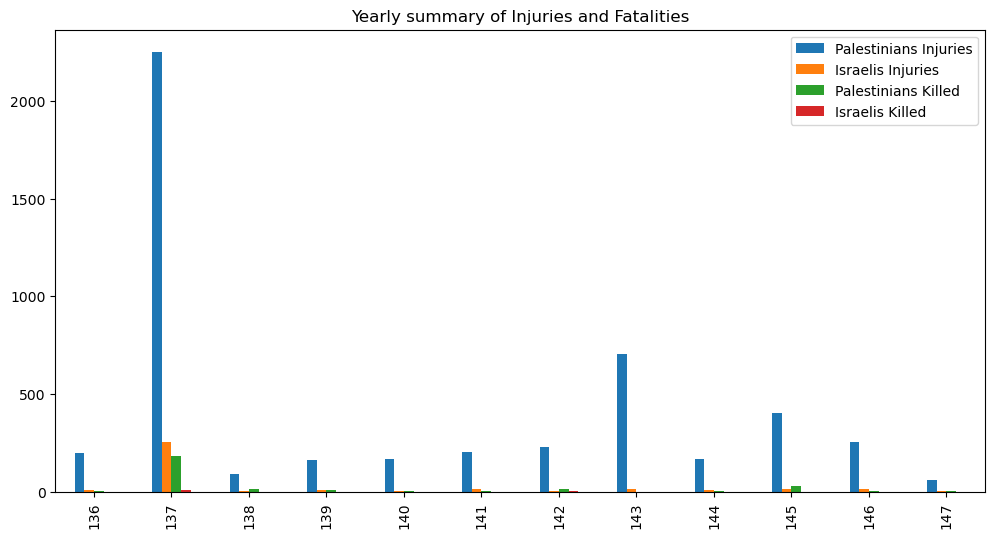

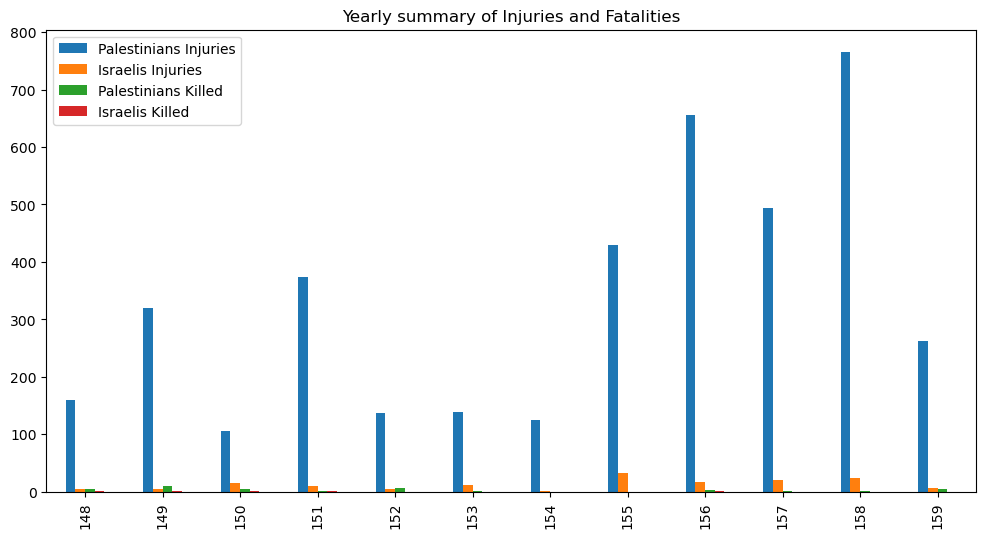

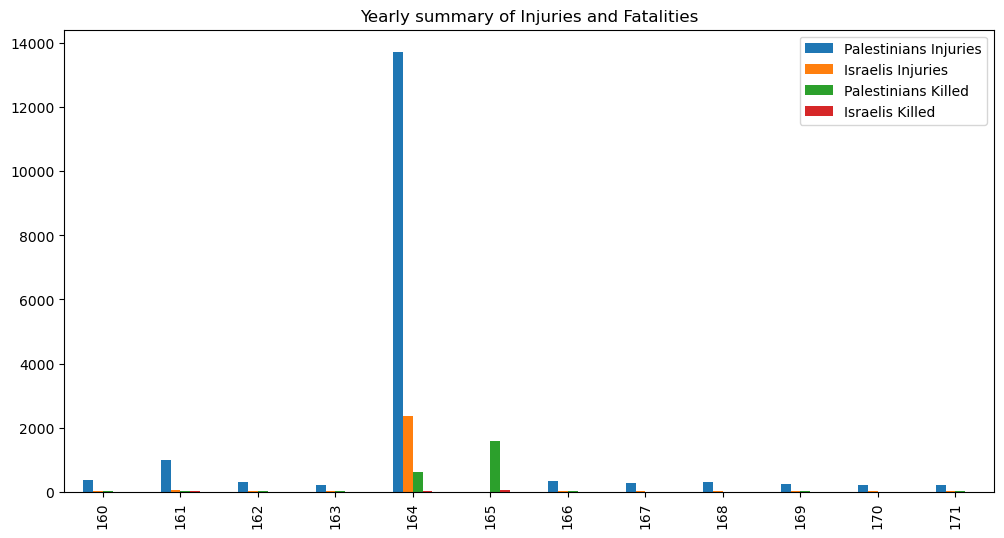

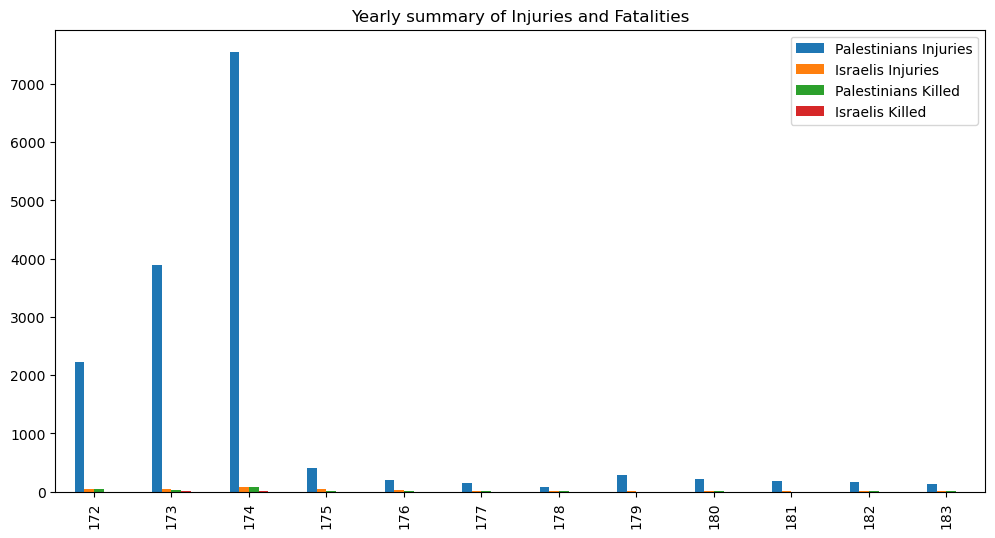

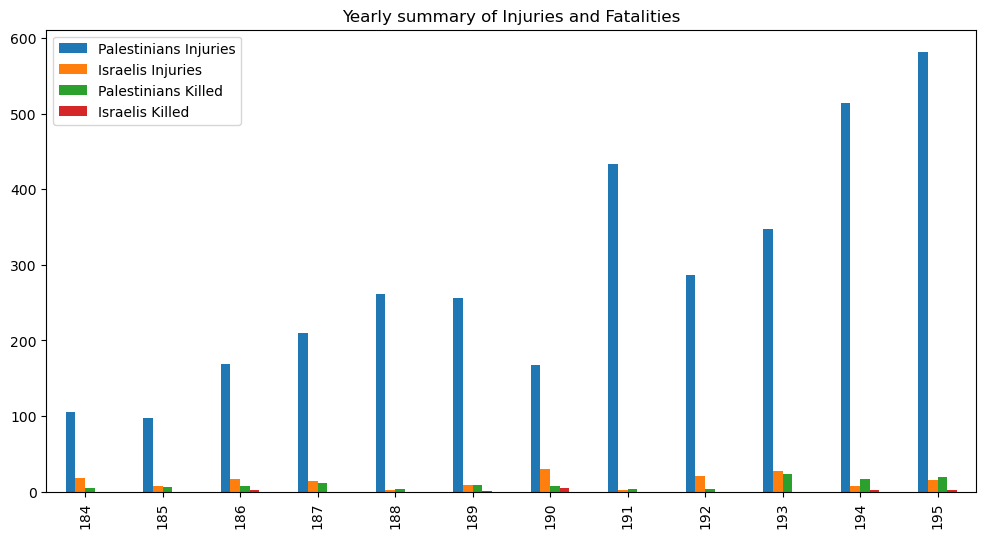

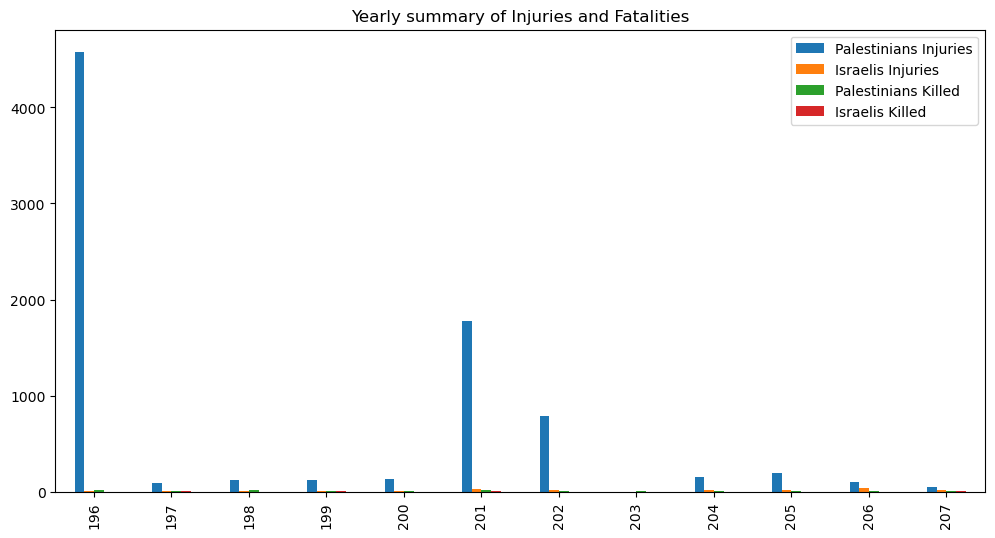

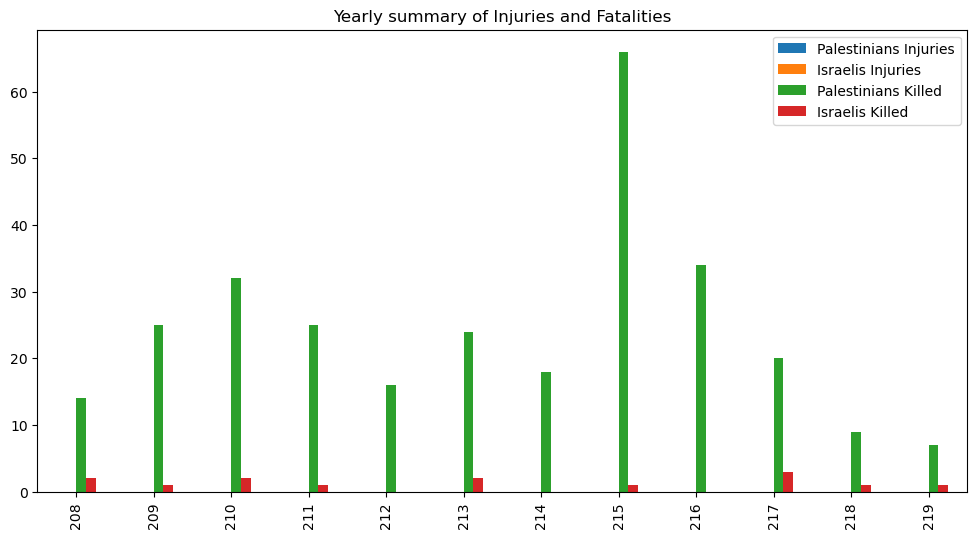

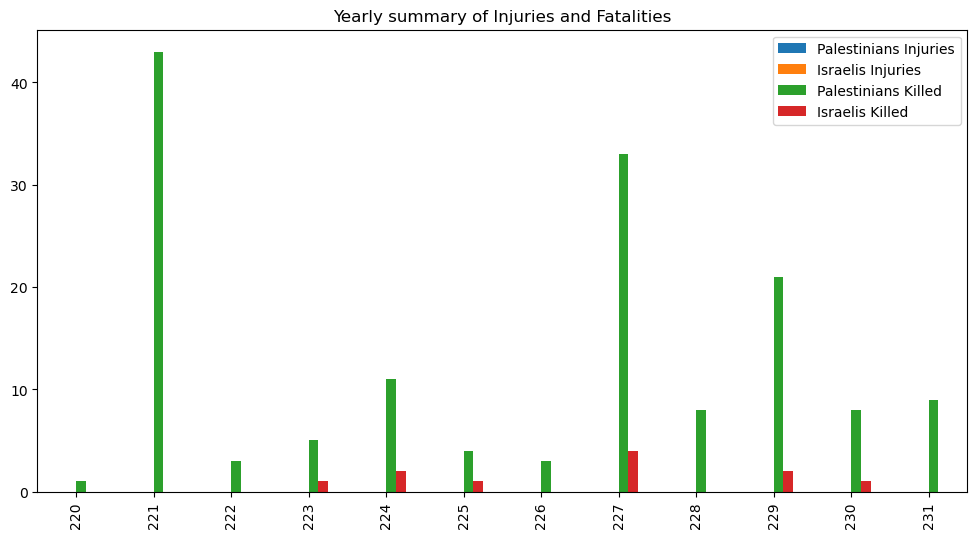

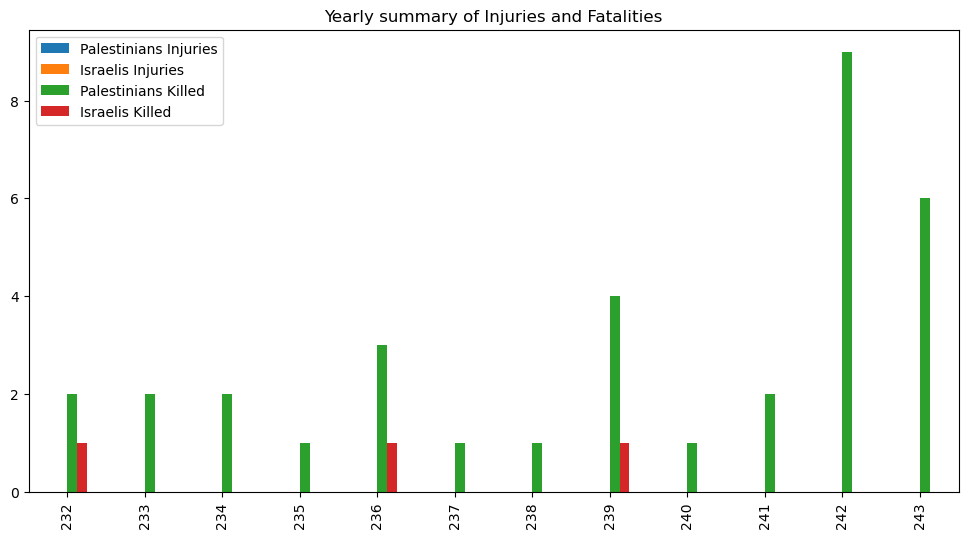

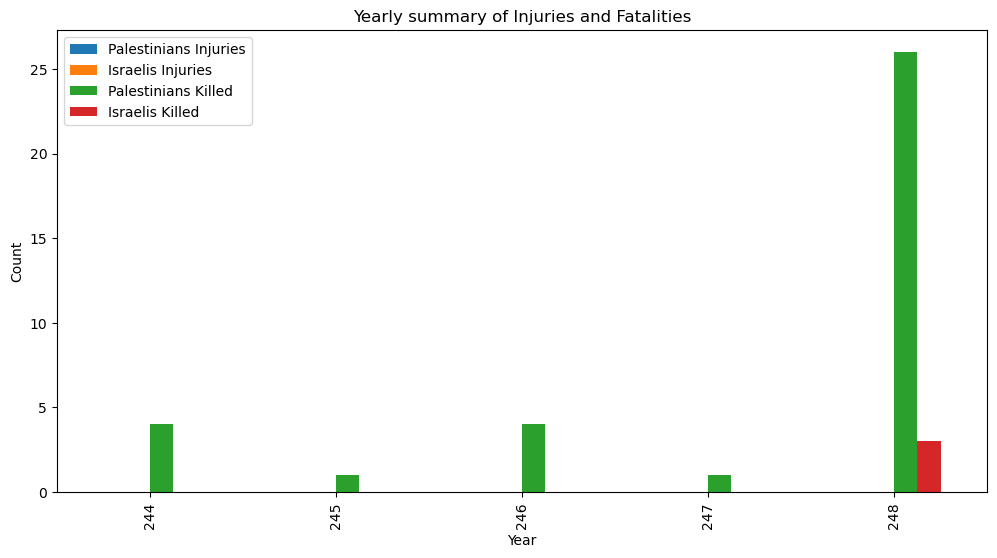

In [89]:
yearly_summary = df.groupby('Year')[['Palestinians Injuries','Israelis Injuries','Palestinians Killed','Israelis Killed']]
yearly_summary.plot(kind = 'bar', figsize=(12,6), title='Yearly summary of Injuries and Fatalities')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [90]:
df['Year']

0      2000
1      2000
2      2000
3      2000
4      2001
       ... 
244    2021
245    2021
246    2021
247    2021
248    2021
Name: Year, Length: 249, dtype: int64

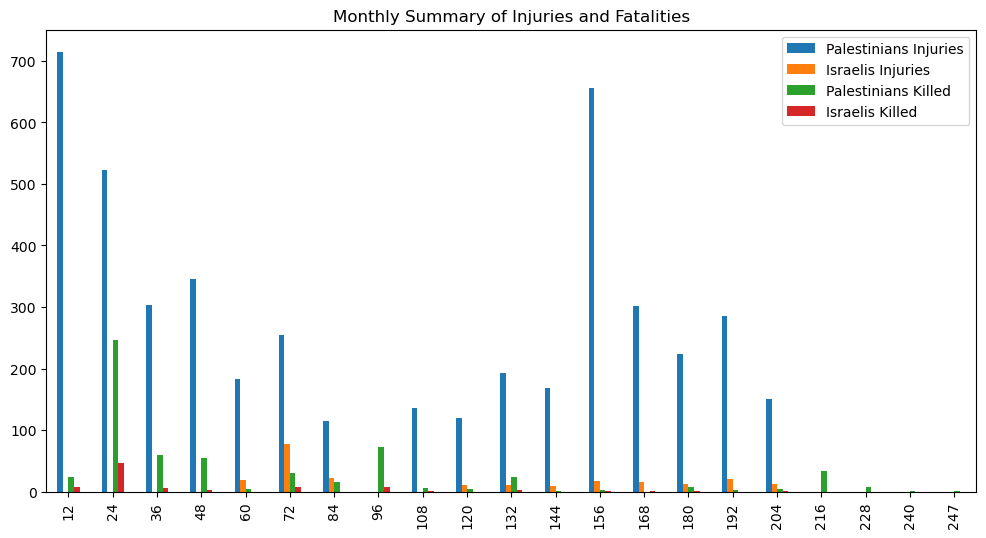

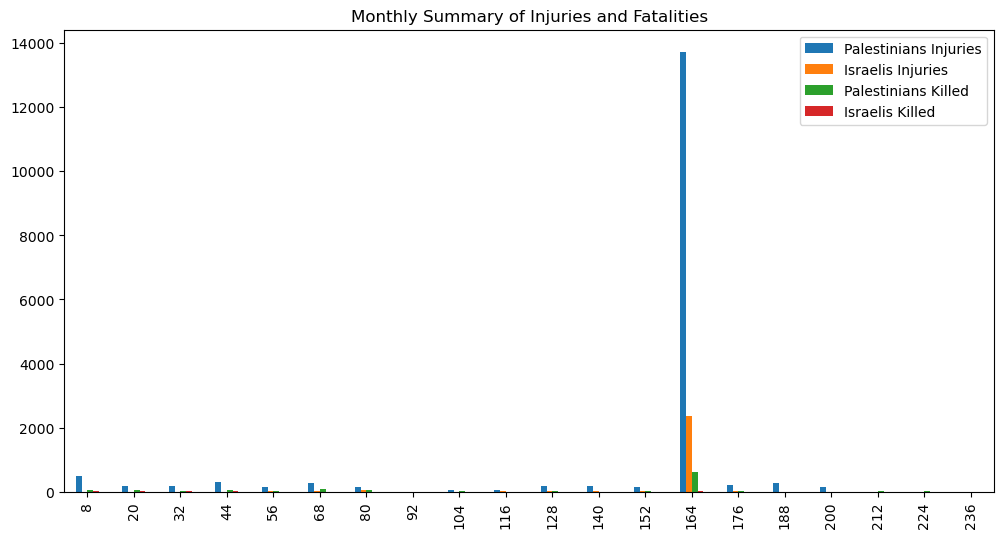

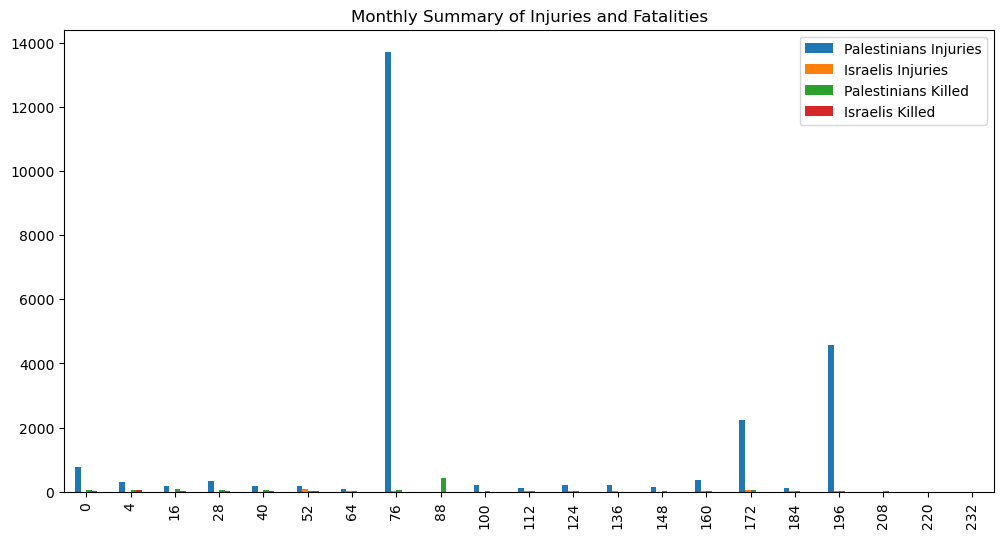

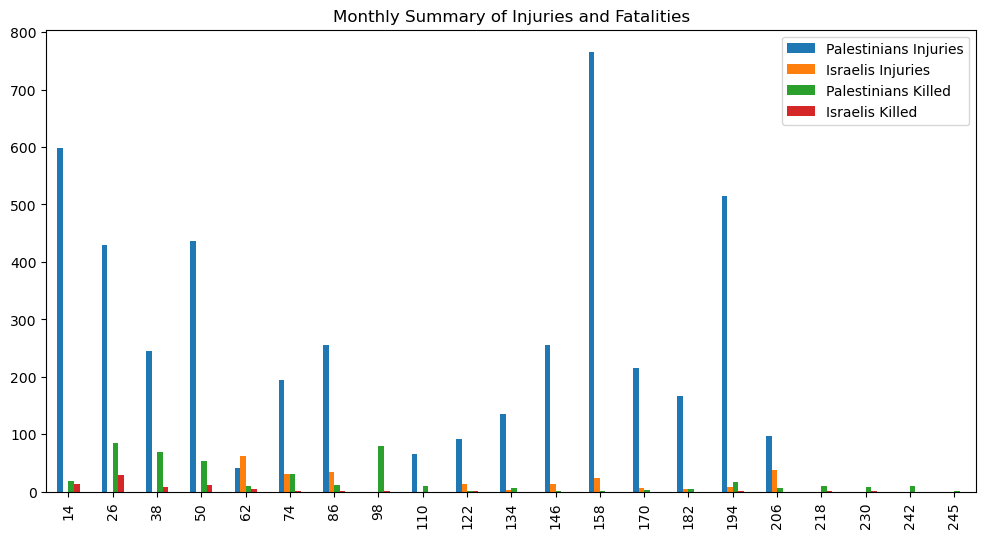

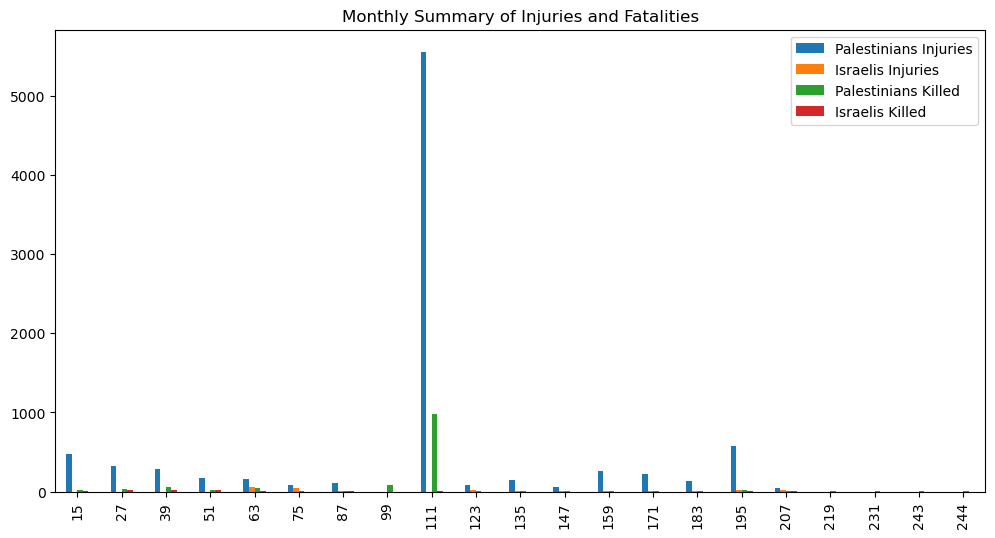

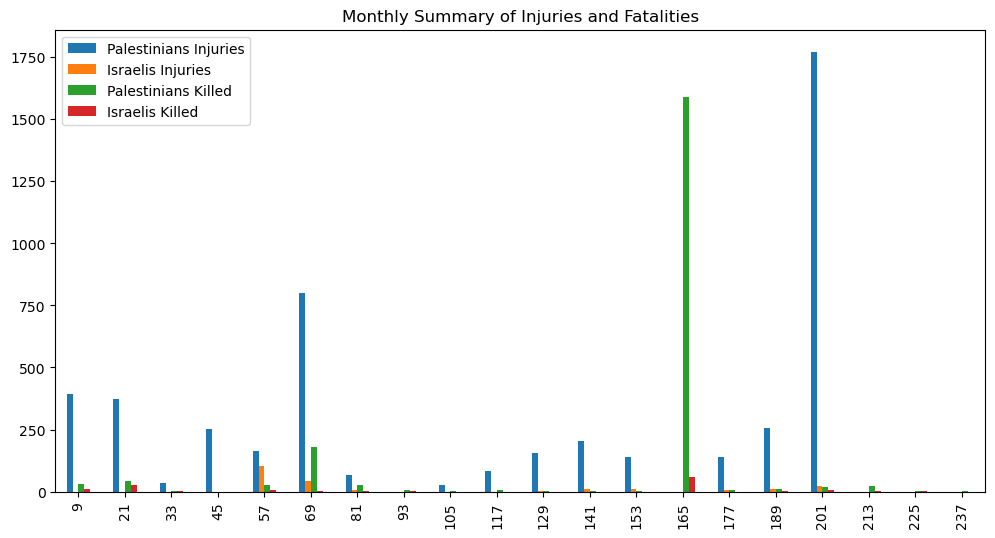

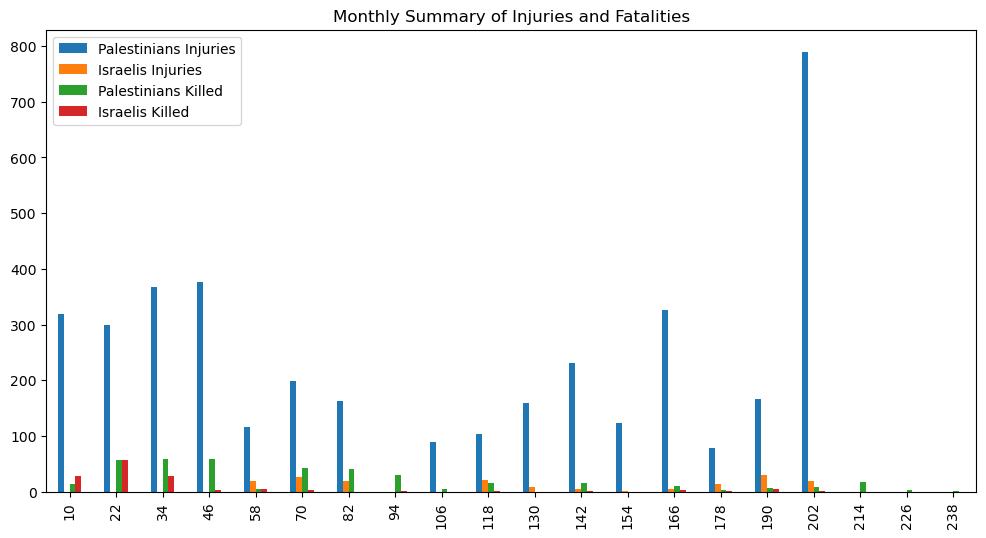

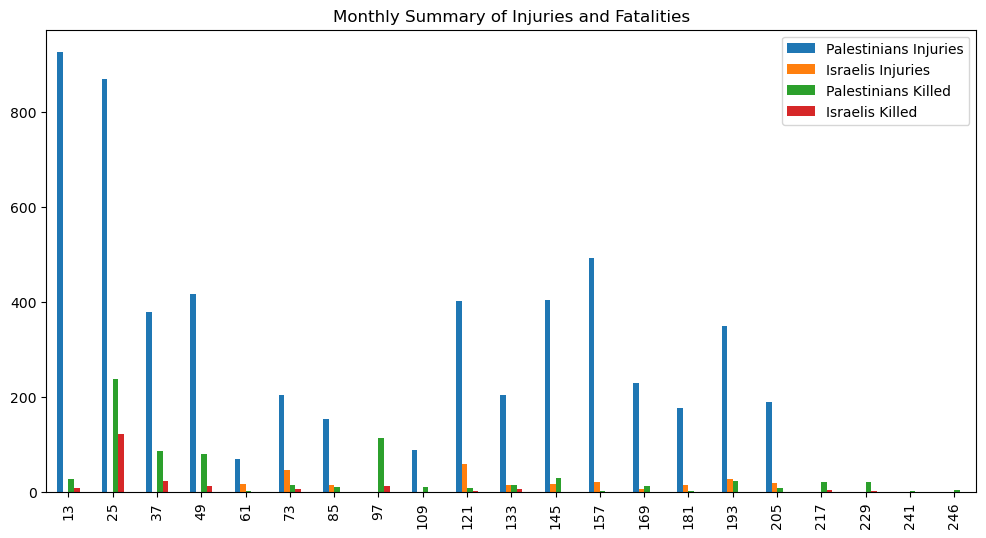

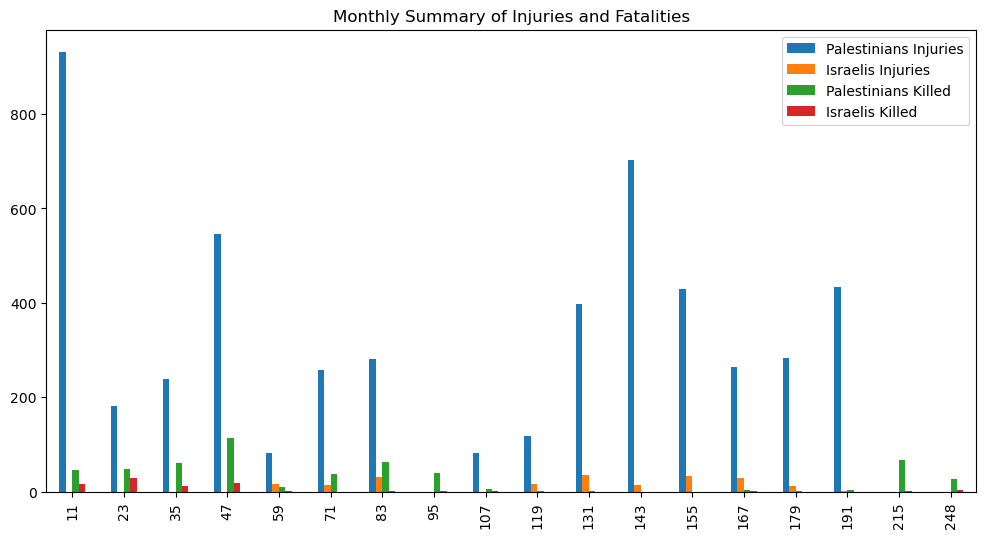

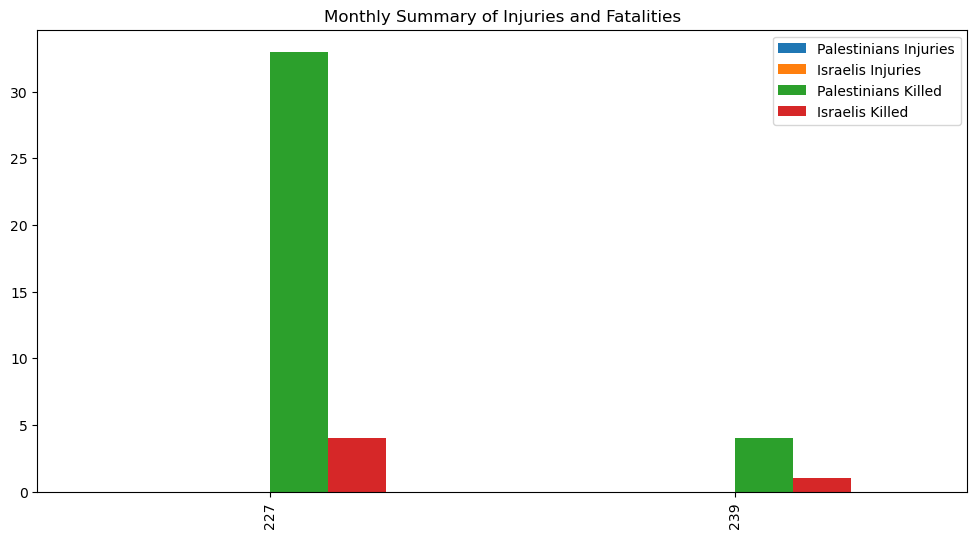

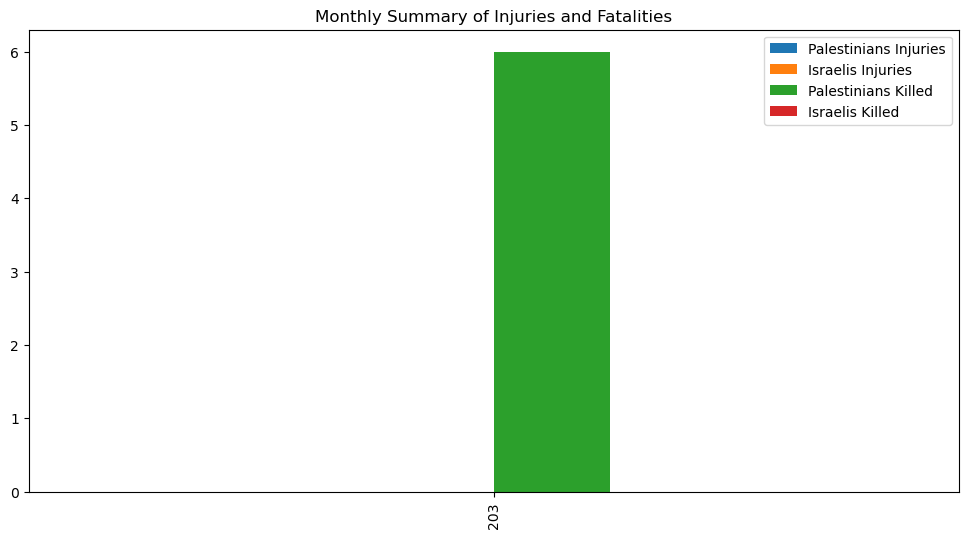

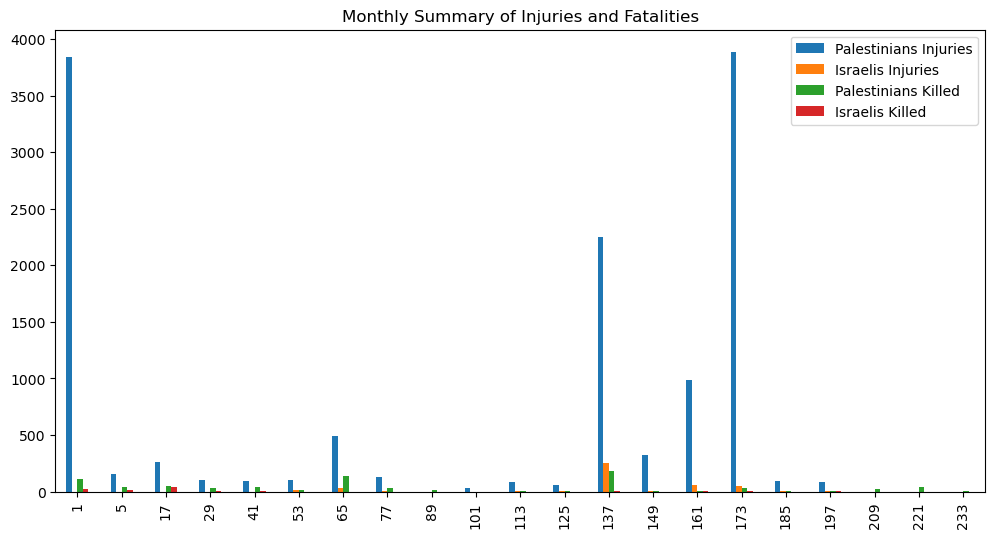

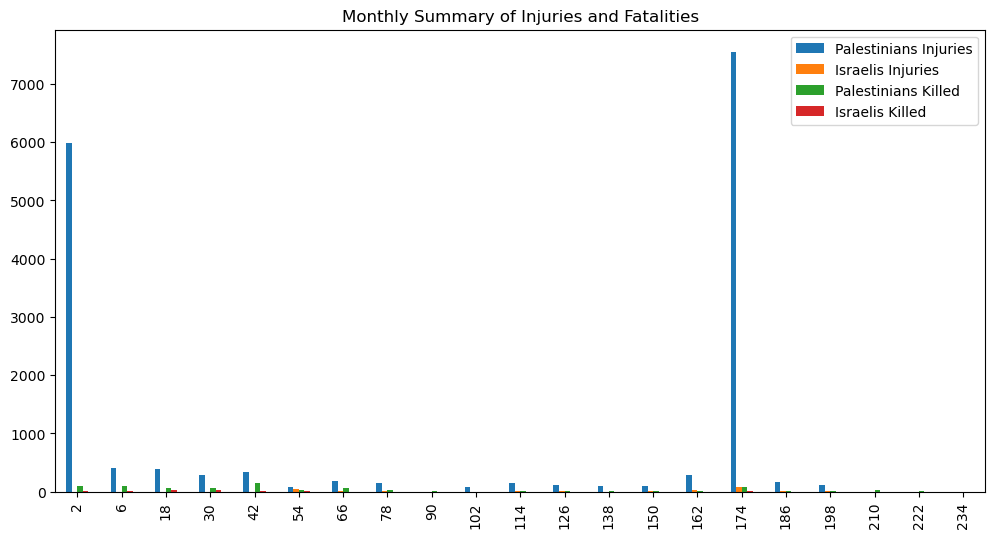

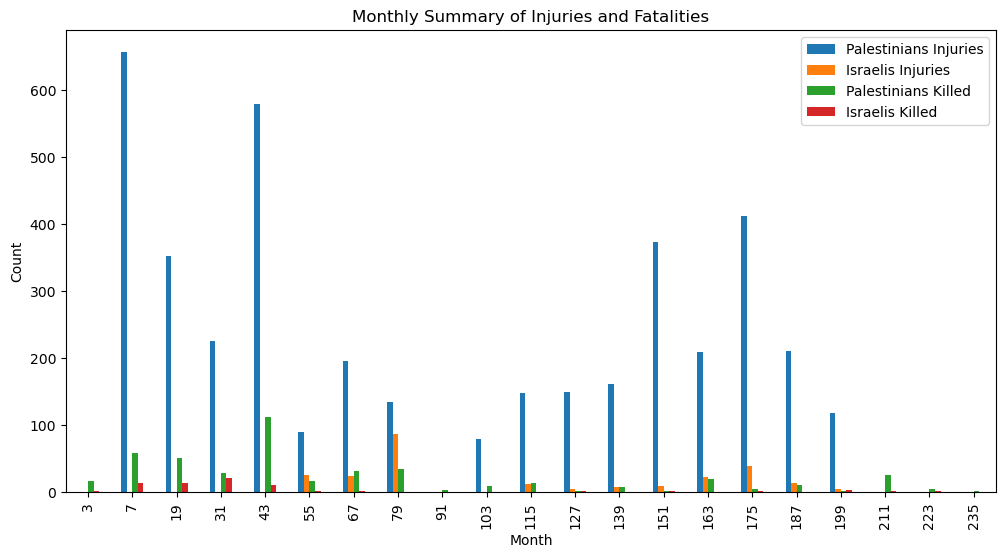

In [91]:
monthly_summary = df.groupby('Month')[['Palestinians Injuries', 'Israelis Injuries','Palestinians Killed', 'Israelis Killed']]
monthly_summary.plot(kind='bar', figsize=(12,6), title="Monthly Summary of Injuries and Fatalities")
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

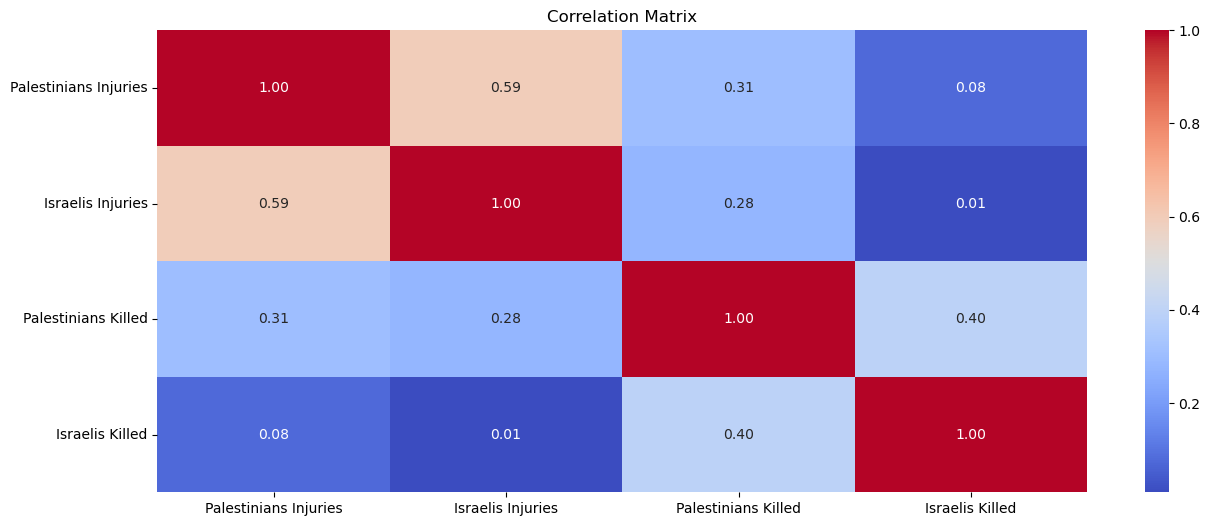

In [92]:
plt.figure(figsize=(15,6))
correlation_matrix = df[['Palestinians Injuries', 'Israelis Injuries','Palestinians Killed', 'Israelis Killed']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

In [96]:
df['Total Incidents'] = df['Palestinians Injuries'] + df['Israelis Injuries'] + df['Palestinians Killed'] + df['Israelis Killed']
df['Palestinians Fatality Rate'] = df['Palestinians Killed'] / df['Total Incidents']
df['Israelis Fatality Rate'] = df['Israelis Killed'] / df['Total Incidents']
df

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed,Total Incidents,Palestinians Fatality Rate,Israelis Fatality Rate
0,2000,DECEMBER,781.0,0.0,51,8,840.0,0.060714,0.009524
1,2000,NOVEMBER,3838.0,0.0,112,22,3972.0,0.028197,0.005539
2,2000,OCTOBER,5984.0,0.0,104,10,6098.0,0.017055,0.001640
3,2000,SEPTEMBER,0.0,0.0,16,1,17.0,0.941176,0.058824
4,2001,DECEMBER,304.0,0.0,67,36,407.0,0.164619,0.088452
...,...,...,...,...,...,...,...,...,...
244,2021,JANUARY,0.0,0.0,4,0,4.0,1.000000,0.000000
245,2021,FEBRUARY,0.0,0.0,1,0,1.0,1.000000,0.000000
246,2021,MARCH,0.0,0.0,4,0,4.0,1.000000,0.000000
247,2021,APRIL,0.0,0.0,1,0,1.0,1.000000,0.000000
